In [ ]:
# Import all necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import datetime as dt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the dataset
calendar_df = pd.read_csv('/content/drive/My Drive/listings_detailed.csv')

# Data Understanding

In [ ]:
# Data Understanding
calendar_df.shape

(6998, 75)

In [ ]:
calendar_df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24


# Data Preparation and Cleaning

# Basic Data Cleaning

# dropping irrelevant attributes

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   listing_url                                   6998 non-null   object 
 2   scrape_id                                     6998 non-null   int64  
 3   last_scraped                                  6998 non-null   object 
 4   source                                        6998 non-null   object 
 5   name                                          6998 non-null   object 
 6   description                                   6992 non-null   object 
 7   neighborhood_overview                         4506 non-null   object 
 8   picture_url                                   6998 non-null   object 
 9   host_id                                       6998 non-null   i

In [ ]:
# drop the 'irrelevant_column' from the DataFrame 'df'
irrelevant_cols = ['listing_url','scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'host_response_time', 'license',
'host_has_profile_pic','bathrooms','first_review','last_review',
'minimum_nights','maximum_nights',                                 
 'minimum_minimum_nights',                        
 'maximum_minimum_nights',                        
 'minimum_maximum_nights',                          
 'maximum_maximum_nights',                         
 'minimum_nights_avg_ntm',                     
 'maximum_nights_avg_ntm','neighbourhood_group_cleansed','calendar_updated']

calendar_df.drop(columns=irrelevant_cols, inplace=True)

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   host_response_rate                            4959 non-null   object 
 2   host_acceptance_rate                          6003 non-null   object 
 3   host_is_superhost                             6994 non-null   object 
 4   host_listings_count                           6998 non-null   int64  
 5   host_total_listings_count                     6998 non-null   int64  
 6   host_identity_verified                        6998 non-null   object 
 7   neighbourhood                                 4506 non-null   object 
 8   neighbourhood_cleansed                        6998 non-null   object 
 9   latitude                                      6998 non-null   f

In [ ]:
calendar_df.describe()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,availability_30,availability_60,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.998000e+03,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6714.000000,6913.000000,6998.000000,6998.000000,...,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6998.000000,6998.000000,6998.000000,6998.000000,6316.000000
mean,1.868001e+17,2.480280,4.438983,52.366767,4.890218,2.908260,1.568811,1.860553,3.805945,7.337811,...,4.759781,4.878554,4.890019,4.788021,4.640970,1.806516,1.023149,0.693055,0.039869,1.134069
std,3.138377e+17,12.798773,26.261102,0.017055,0.035085,1.387231,0.905707,1.574701,6.881970,12.744246,...,0.323061,0.233375,0.234914,0.252756,0.321297,2.474394,1.386672,1.939071,0.448247,2.396285
min,2.818000e+03,1.000000,1.000000,52.290340,4.755710,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.578534e+07,1.000000,1.000000,52.355979,4.866687,2.000000,1.000000,1.000000,0.000000,0.000000,...,4.670000,4.850000,4.870000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.270000
50%,3.534389e+07,1.000000,1.000000,52.366065,4.888160,2.000000,1.000000,1.000000,0.000000,1.000000,...,4.860000,4.950000,4.970000,4.860000,4.690000,1.000000,1.000000,0.000000,0.000000,0.530000
75%,5.821187e+17,2.000000,3.000000,52.376540,4.908185,4.000000,2.000000,2.000000,5.000000,9.000000,...,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,1.000000,0.000000,1.170000
max,8.427546e+17,522.000000,699.000000,52.425120,5.026430,16.000000,17.000000,33.000000,30.000000,60.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,14.000000,20.000000,8.000000,111.590000


# dealing with missing values

In [ ]:
# Print number of missing values
calendar_df.isna().sum()

id                                                 0
host_response_rate                              2039
host_acceptance_rate                             995
host_is_superhost                                  4
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
neighbourhood                                   2492
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    13
bedrooms                                         284
beds                                              85
amenities                                          0
price                                         

In [ ]:
# Remove $ and convert price to float

calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df['price'].mean()

223.03886824807088

In [ ]:
# Removing % signs 

calendar_df['host_response_rate'] = calendar_df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
calendar_df['host_acceptance_rate'] = calendar_df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


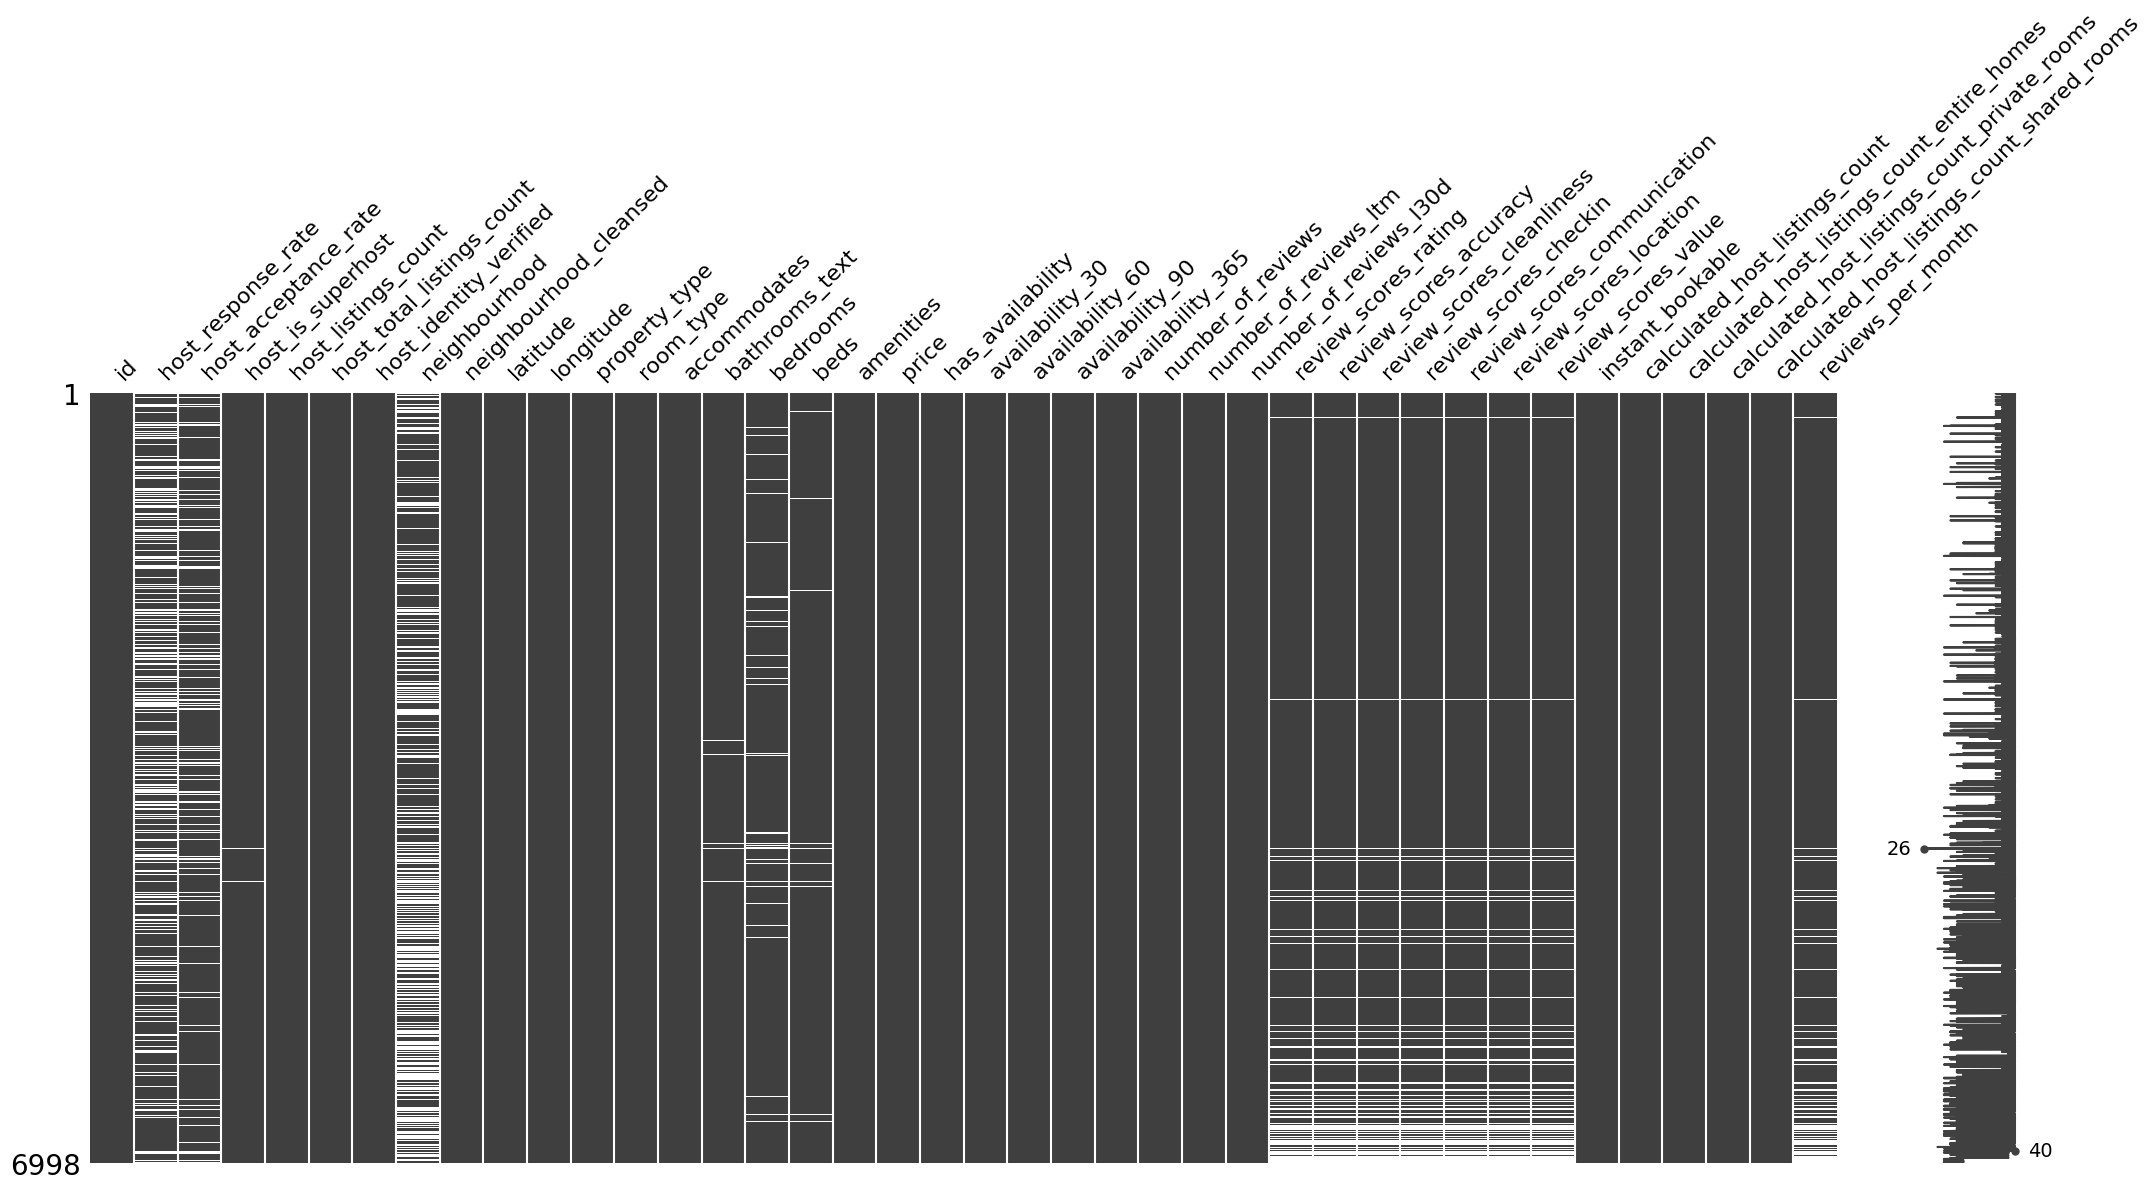

In [ ]:
# Visualize the missingness 
msno.matrix(calendar_df)
plt.show()

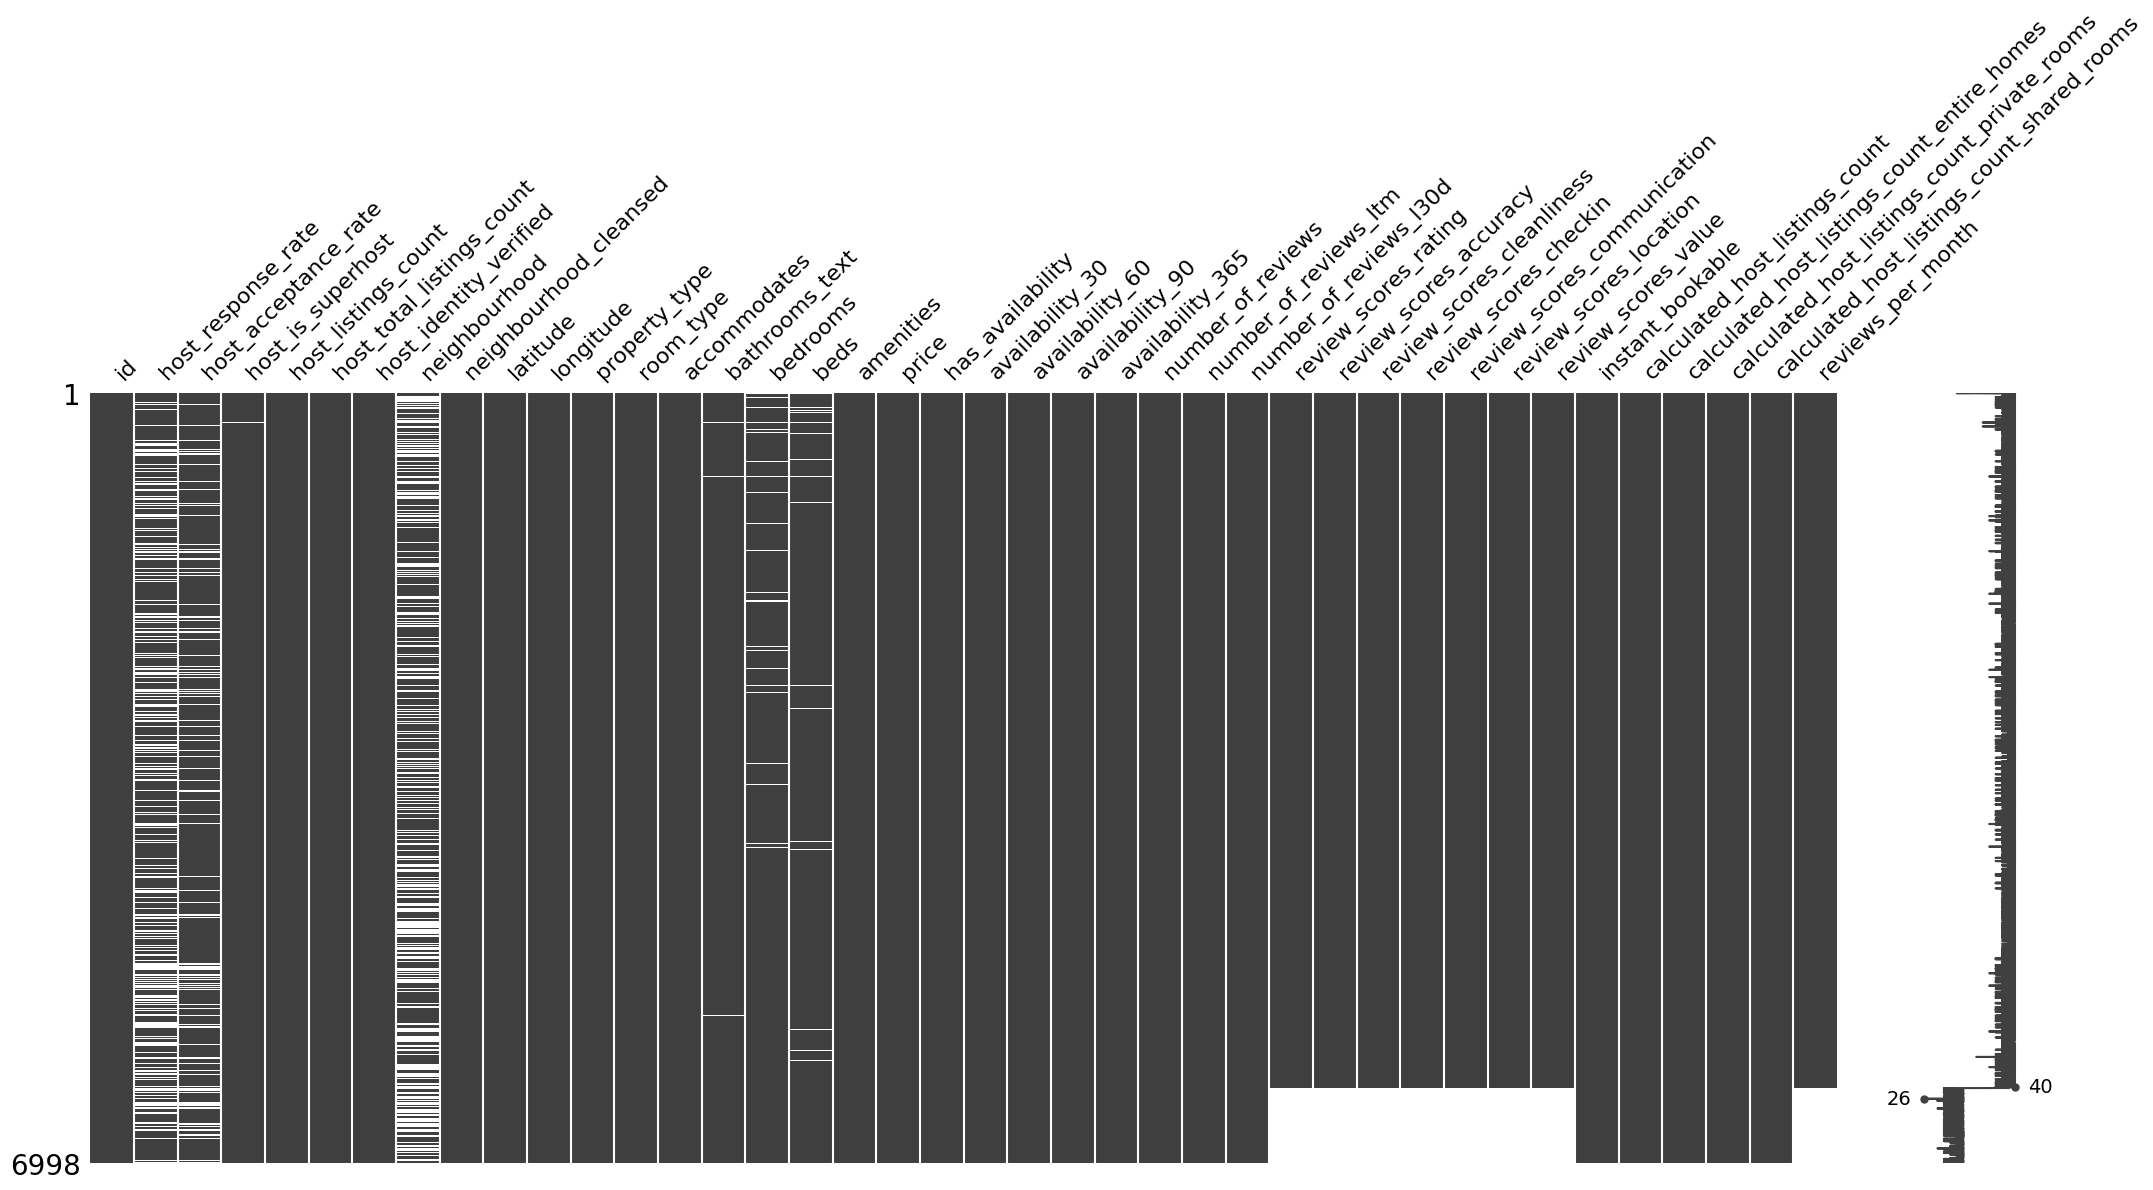

In [ ]:
# Visualize the missingness on sorted values
msno.matrix(calendar_df.sort_values(by ='review_scores_rating'))
plt.show()

<Axes: >

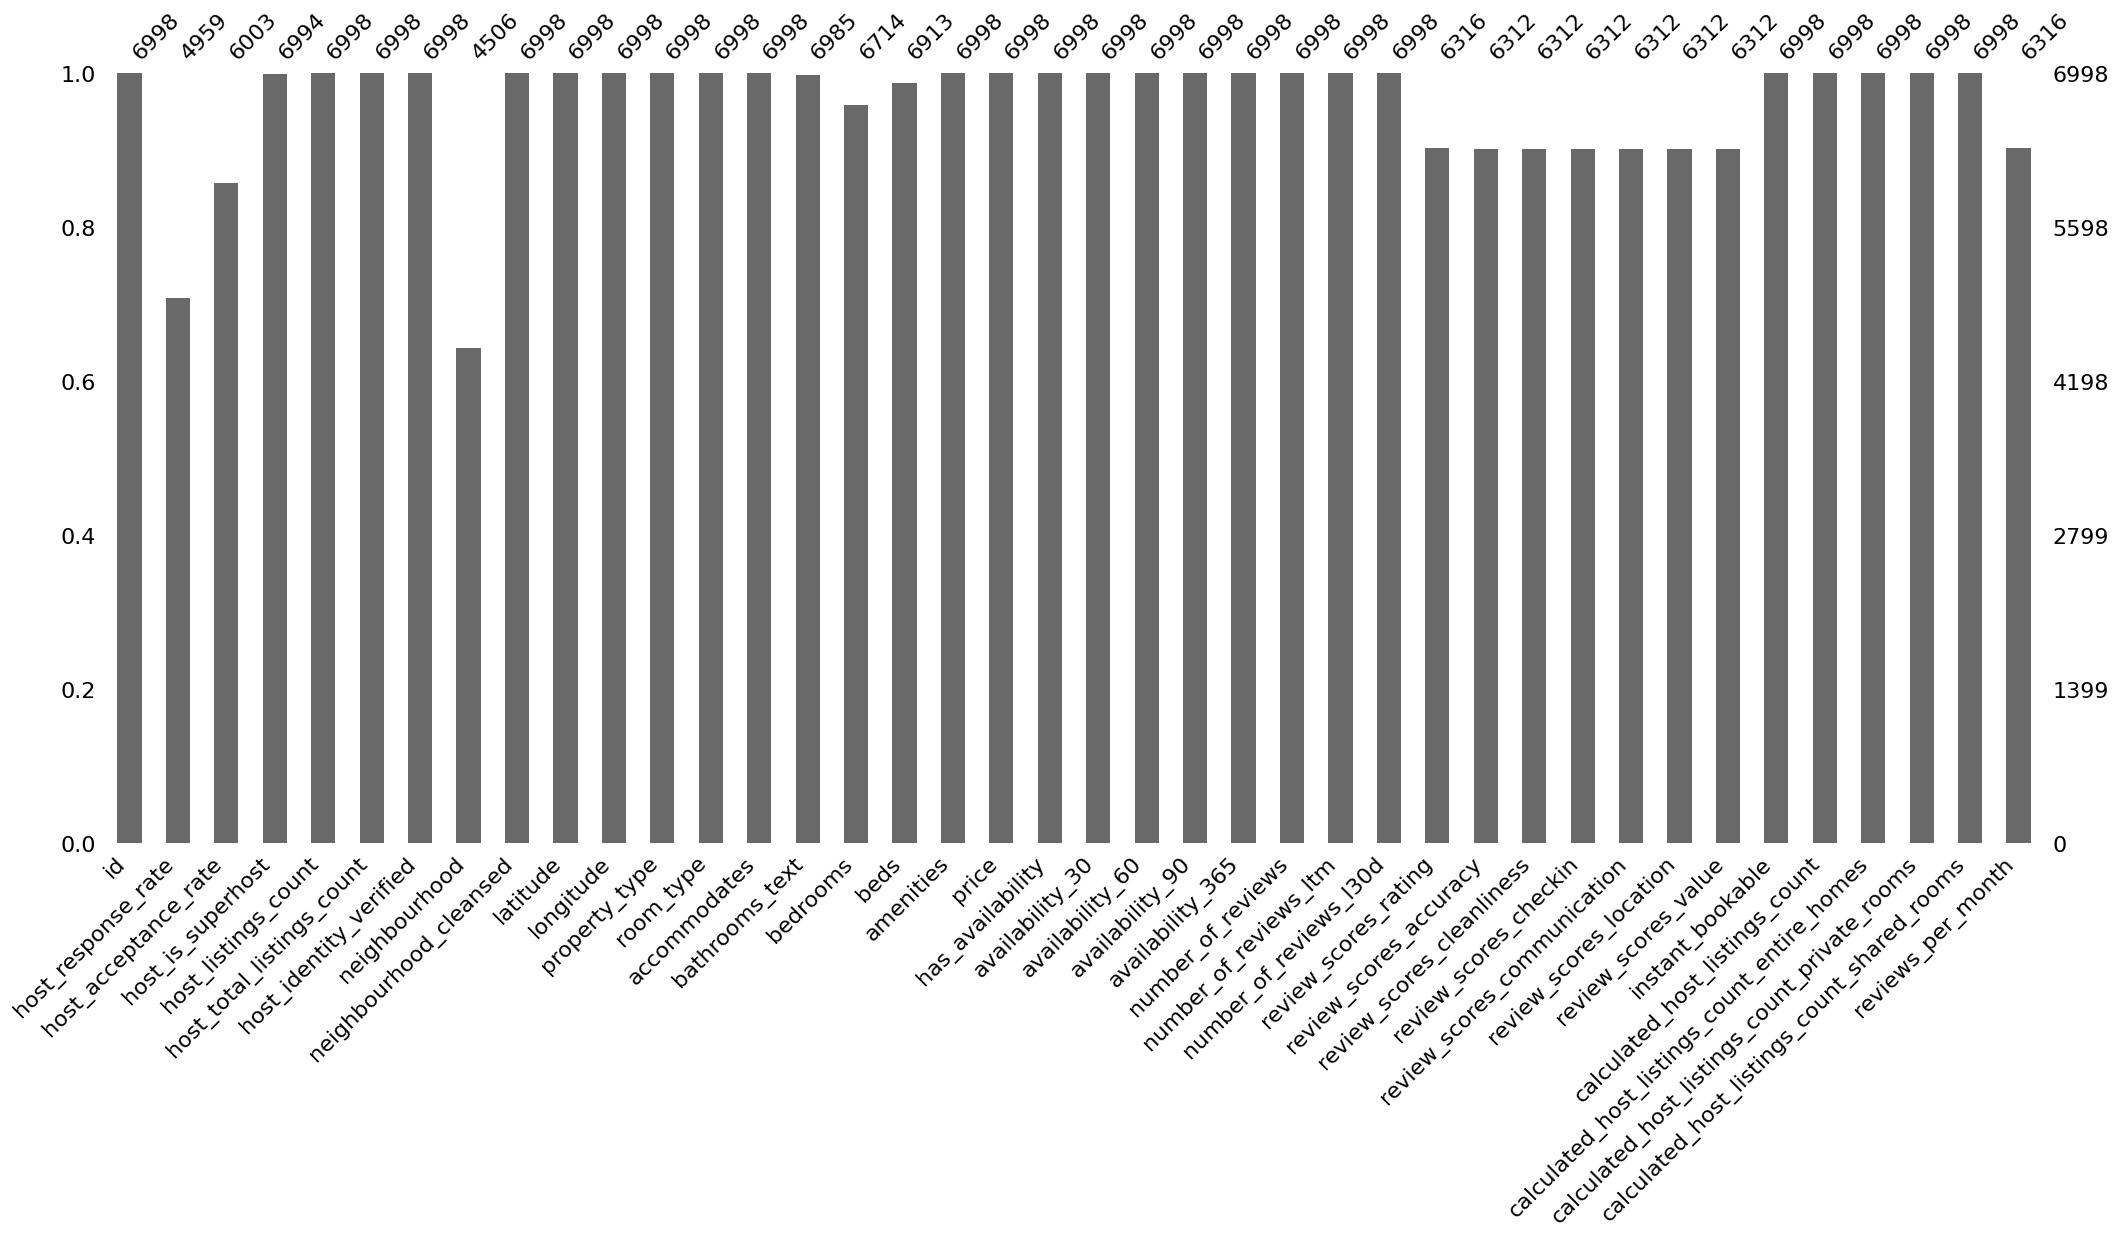

In [ ]:
# Missingness barplot
msno.bar(calendar_df)

In [ ]:
# Impute missing data
calendar_df = calendar_df.fillna({'review_scores_rating':0,
                        'review_scores_accuracy':0,
                        'review_scores_cleanliness':0,
                        'review_scores_checkin':0,       
                        'review_scores_communication':0,                    
                        'review_scores_location' :0,                           
                        'review_scores_value' :0 ,
                        'host_response_rate' :0,
                        'neighbourhood_group_cleansed':0,
                        'bathrooms_text' :0 ,        
                        'bedrooms'   :0 ,                                     
                        'beds'    :0                                        

                        })

In [ ]:
# convert bedrooms, bathrooms, accommodates count to int from float
calendar_df.bedrooms =calendar_df.bedrooms.astype('int')
calendar_df.accommodates = calendar_df.accommodates.astype('int')

# Removing duplicates and data inconsistensies

In [ ]:
# drop rows with price <= 0, bedrooms <=0, accommodates <= 0

calendar_df = calendar_df[calendar_df.price > 0]
calendar_df = calendar_df[calendar_df.bedrooms > 0]
calendar_df = calendar_df[calendar_df.accommodates > 0]

# Dataset Analysis

In [ ]:

# checking if the target label has all entries recorded
calendar_df.price.count()


6714

In [ ]:
calendar_df.shape

(6714, 40)

In [ ]:
# categorizing number of listings with room type
room_type_count = calendar_df.room_type.value_counts()
room_type_count

Entire home/apt    5009
Private room       1612
Hotel room           54
Shared room          39
Name: room_type, dtype: int64

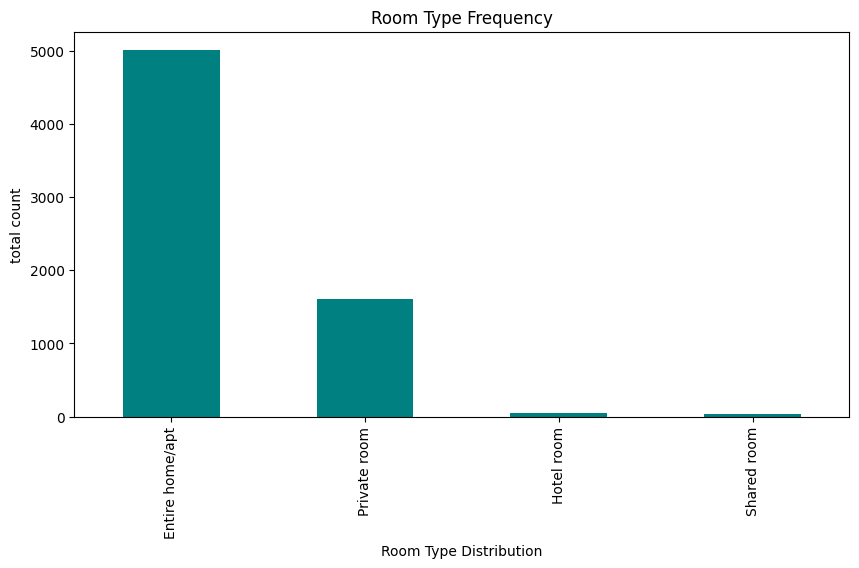

In [ ]:
room_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Room Type Frequency')
plt.xlabel('Room Type Distribution');
plt.ylabel('total count');
#room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution')

In [ ]:
# clean property type column
calendar_df.property_type.unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Private room in home', 'Entire loft', 'Private room in townhouse',
       'Boat', 'Entire townhouse', 'Private room in condo',
       'Entire condo', 'Private room in houseboat', 'Entire guest suite',
       'Private room in loft', 'Private room in bed and breakfast',
       'Entire home', 'Private room in guest suite',
       'Private room in boat', 'Room in boutique hotel',
       'Private room in farm stay', 'Houseboat',
       'Room in bed and breakfast', 'Entire guesthouse', 'Entire chalet',
       'Private room in guesthouse', 'Shared room in rental unit',
       'Shared room in home', 'Private room in serviced apartment',
       'Entire villa', 'Private room in villa',
       'Private room in casa particular', 'Entire serviced apartment',
       'Private room in bungalow', 'Barn', 'Entire cabin',
       'Room in hotel', 'Room in aparthotel', 'Entire place', 'Tiny home',
       'Entire cottage', 'Private room in 

In [ ]:
calendar_df = calendar_df[calendar_df.property_type != 0]
# number of listings based on the property type
property_type_count = calendar_df.property_type.value_counts()
property_type_count

Entire rental unit                    2462
Entire condo                          1282
Entire home                            468
Private room in rental unit            449
Private room in bed and breakfast      272
Entire townhouse                       212
Entire loft                            172
Private room in condo                  141
Houseboat                              127
Private room in home                   122
Room in boutique hotel                 110
Room in hotel                           97
Boat                                    91
Private room in houseboat               86
Private room in guest suite             81
Private room in townhouse               80
Entire serviced apartment               78
Private room in boat                    50
Private room in loft                    40
Entire villa                            25
Room in bed and breakfast               23
Shared room in hostel                   23
Entire guest suite                      18
Private roo

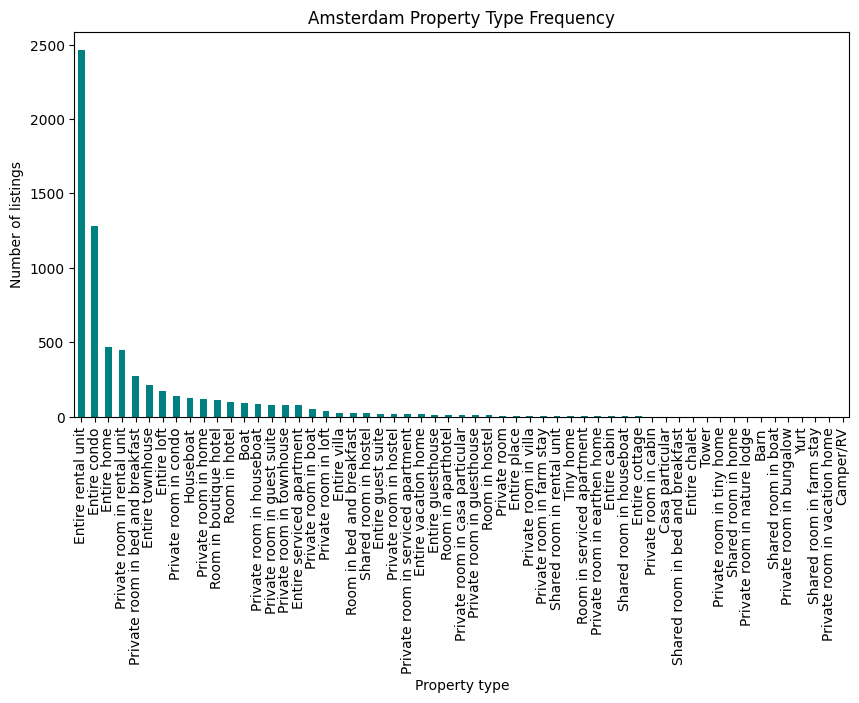

In [ ]:
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Amsterdam Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [ ]:
prices_data = calendar_df.groupby(['property_type','room_type']).price.mean()
prices_data

property_type                       room_type      
Barn                                Entire home/apt     85.000000
Boat                                Entire home/apt    400.395604
Camper/RV                           Entire home/apt    140.000000
Casa particular                     Entire home/apt    231.000000
Entire cabin                        Entire home/apt    132.200000
Entire chalet                       Entire home/apt    120.000000
Entire condo                        Entire home/apt    264.387676
Entire cottage                      Entire home/apt    303.750000
Entire guest suite                  Entire home/apt    159.000000
Entire guesthouse                   Entire home/apt    185.866667
Entire home                         Entire home/apt    288.168803
Entire loft                         Entire home/apt    308.494186
Entire place                        Entire home/apt    379.875000
Entire rental unit                  Entire home/apt    217.298944
Entire serviced apartmen

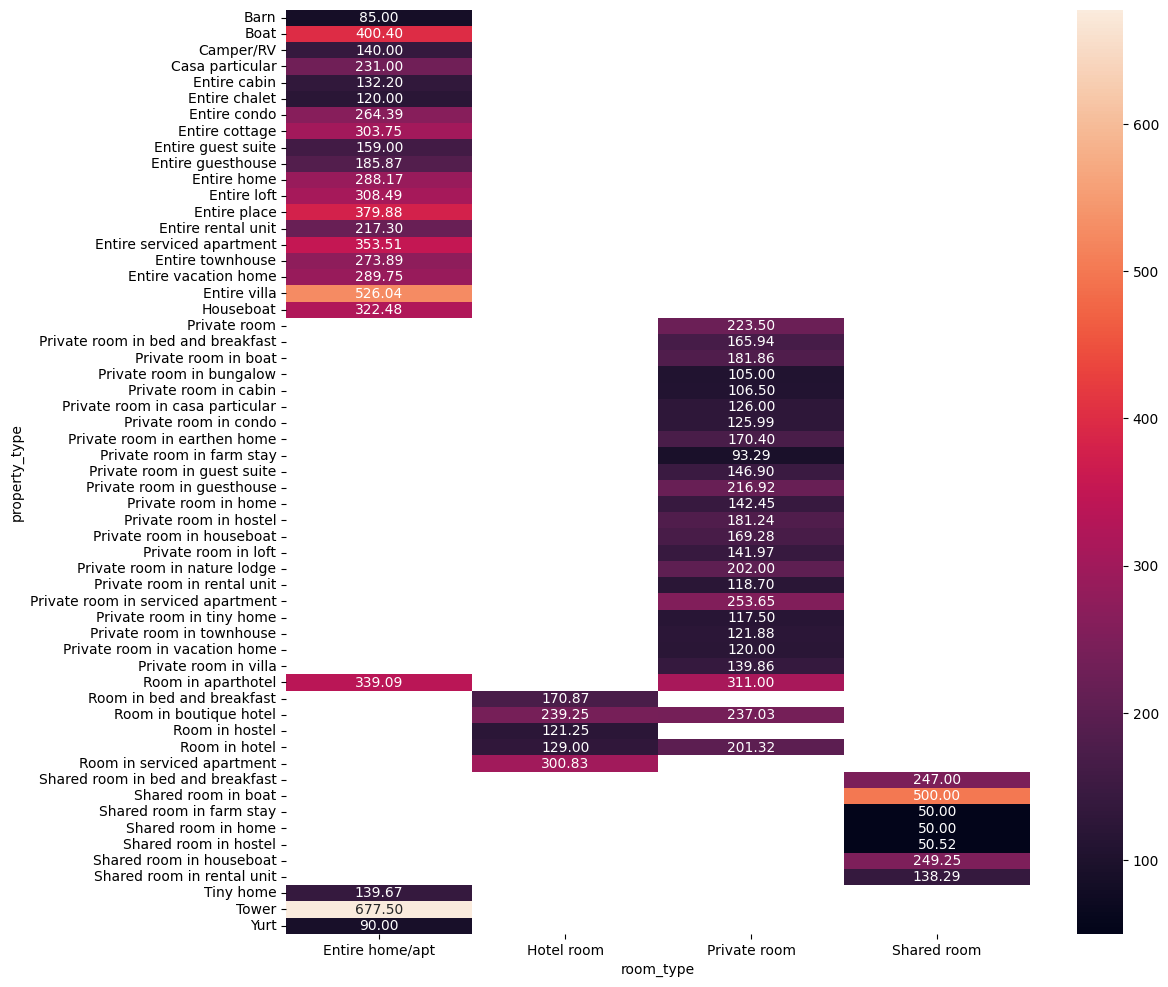

In [ ]:
plt.figure(figsize=(12,12));
sns.heatmap(calendar_df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   object 
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   object 
 7   neighbourhood                                 4333 non-null   object 
 8   neighbourhood_cleansed                        6714 non-null   object 
 9   latitude                                      6714 non-null   f

In [ ]:
calendar_df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed  room_type      
Bijlmer-Centrum         Entire home/apt    165.428571
                        Private room       103.736842
Bijlmer-Oost            Entire home/apt    190.352941
                        Private room        82.900000
Bos en Lommer           Entire home/apt    191.665529
                                              ...    
Westerpark              Shared room         65.000000
Zuid                    Entire home/apt    284.159091
                        Hotel room         144.000000
                        Private room       166.242424
                        Shared room         75.000000
Name: price, Length: 67, dtype: float64

<Axes: xlabel='room_type', ylabel='neighbourhood_cleansed'>

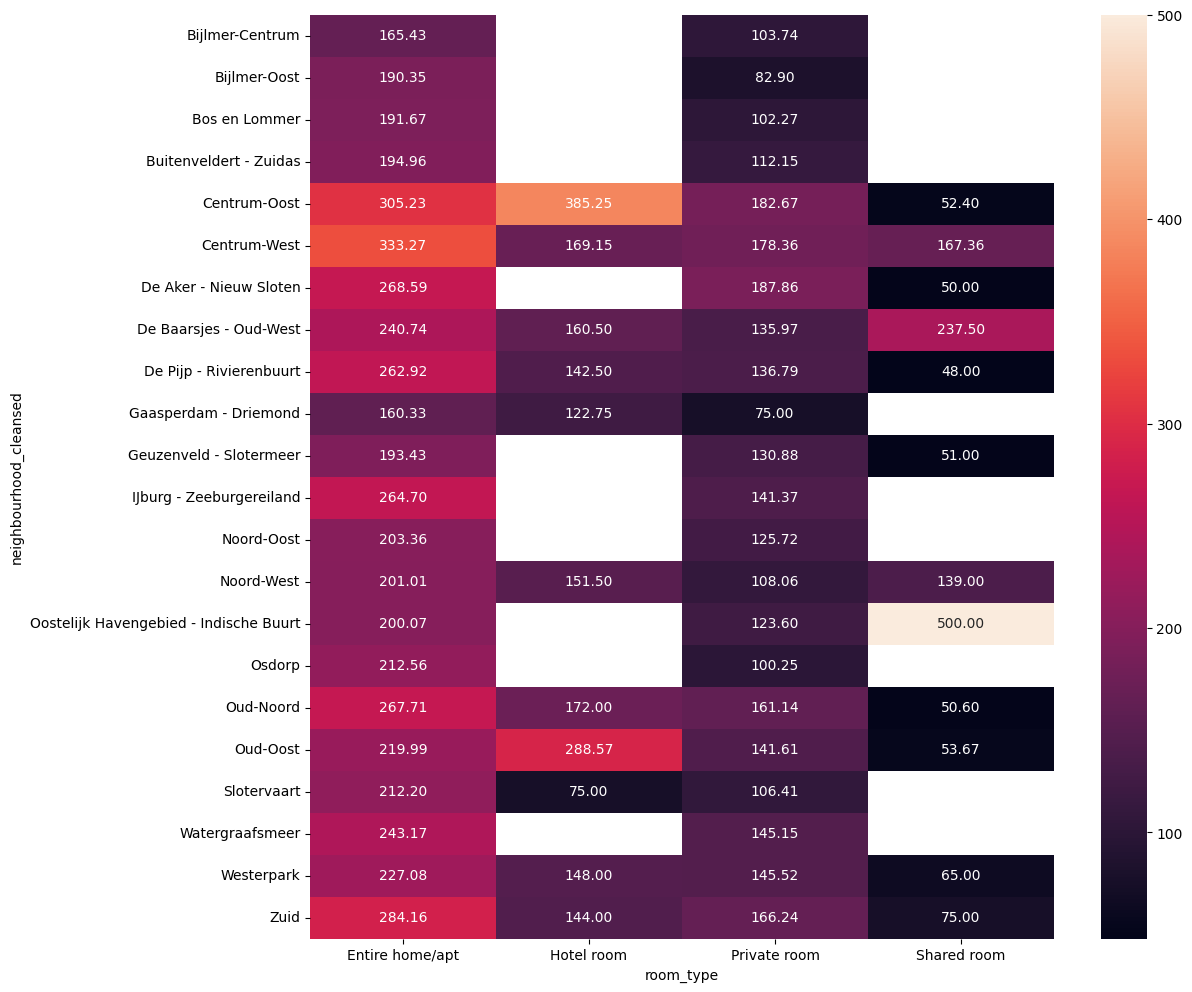

In [ ]:
plt.figure(figsize=(12,12));
sns.heatmap(calendar_df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")

In [ ]:
calendar_df.groupby(['instant_bookable','room_type']).price.mean()


instant_bookable  room_type      
f                 Entire home/apt    248.646737
                  Hotel room         173.600000
                  Private room       142.153527
                  Shared room        187.100000
t                 Entire home/apt    272.105263
                  Hotel room         192.136364
                  Private room       166.677469
                  Shared room         81.034483
Name: price, dtype: float64

<Axes: xlabel='room_type', ylabel='instant_bookable'>

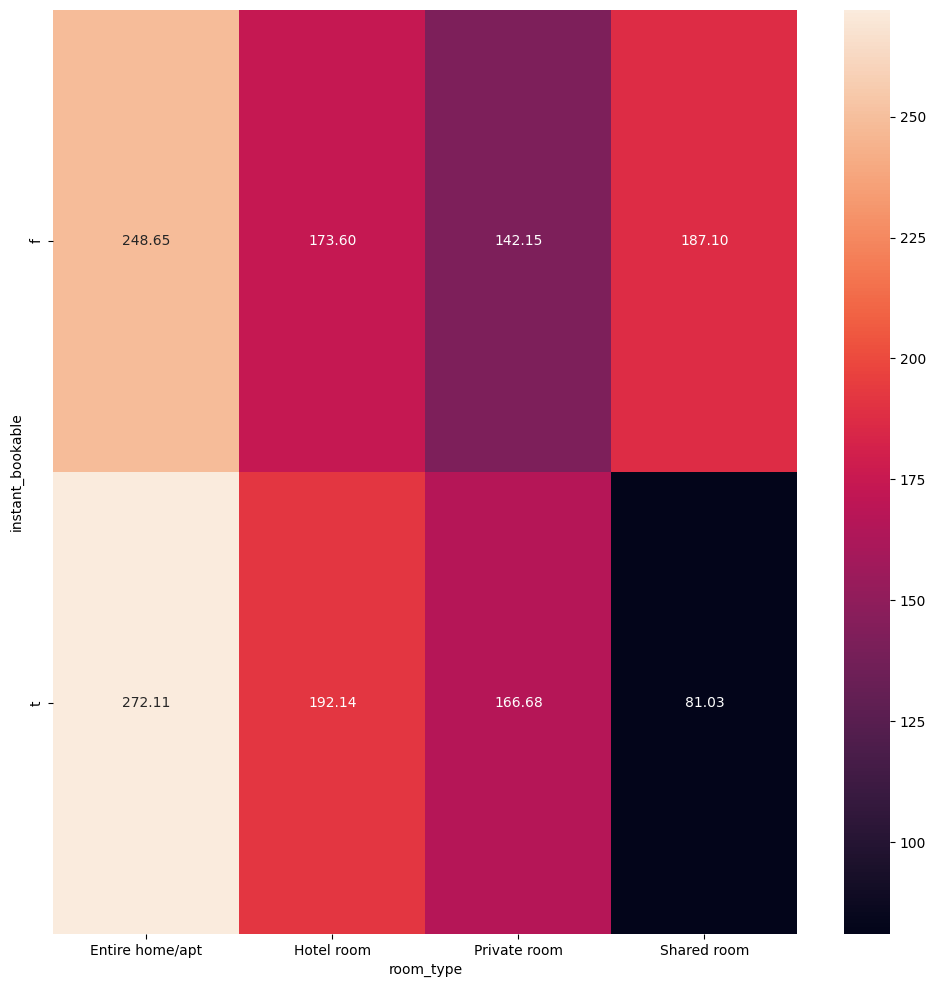

In [ ]:
plt.figure(figsize=(12,12));
sns.heatmap(calendar_df.groupby(['instant_bookable', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")

In [ ]:
calendar_df.groupby(['bedrooms','room_type']).price.mean()

bedrooms  room_type      
1         Entire home/apt     200.311703
          Hotel room          167.104167
          Private room        138.912393
          Shared room         108.230769
2         Entire home/apt     281.472279
          Hotel room          361.500000
          Private room        223.465608
3         Entire home/apt     327.995305
          Private room        317.538462
4         Entire home/apt     355.591837
          Private room        484.333333
5         Entire home/apt     583.580645
6         Entire home/apt     626.000000
7         Entire home/apt    2687.000000
          Private room        636.000000
8         Entire home/apt     766.000000
10        Entire home/apt    1537.666667
          Private room        779.000000
17        Entire home/apt    2656.000000
Name: price, dtype: float64

# Conclusions



1.   Entire home apt is the most commonly occurring room type in Amsterdam
2.   entire rental unit property type is  most commonly occurring property type in Amsterdam
3.   Entire cabin,shared room in housebat,private room in earthen roomproperty type has least frequency.
4.Entire villa and tower property type with room type entire home apt has the highest price. 
5.Shared room in home and hostel with room type shared room has the least price.
6.Shared room in the nieghbourhood  Oostelijk Havengebied - Indische Buurt has the the highest price. 
7.Room types that are instatnt bookabale have the highest price then those rooms that can not be instantly booked except shared room.
8.17 and 7 bedrooms with room type entire home apt have the highest pricing among all room types and number of bedrooms.
9.Only 1 room in the shared room category has the minimum price.










<Axes: xlabel='room_type', ylabel='bedrooms'>

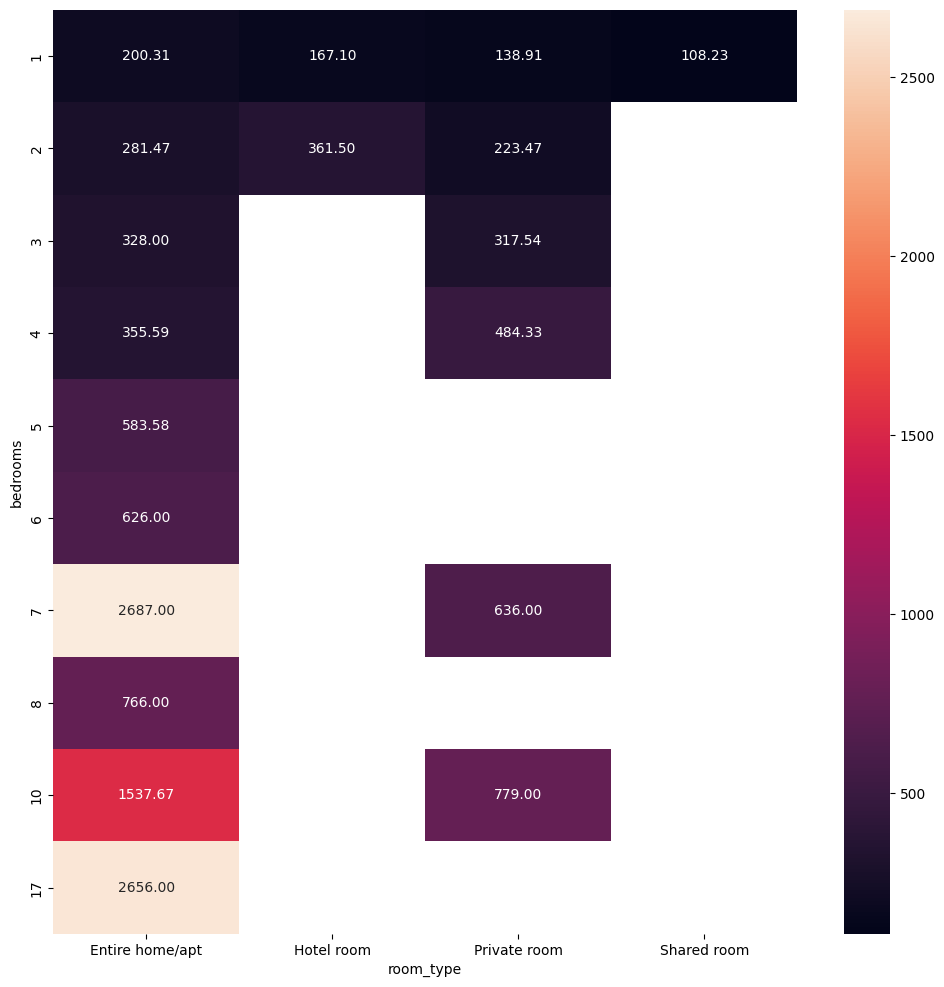

In [ ]:
plt.figure(figsize=(12,12));
sns.heatmap(calendar_df.groupby(['bedrooms', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")

# Where to invest in a property in Amsterdam to get the maximum number of returns from Airbnb?

In [ ]:
# average price of listings w.r.t room type
price_per_room_type = calendar_df.groupby('room_type').price.mean()
price_per_room_type

room_type
Entire home/apt    251.583150
Hotel room         188.703704
Private room       152.011787
Shared room        108.230769
Name: price, dtype: float64

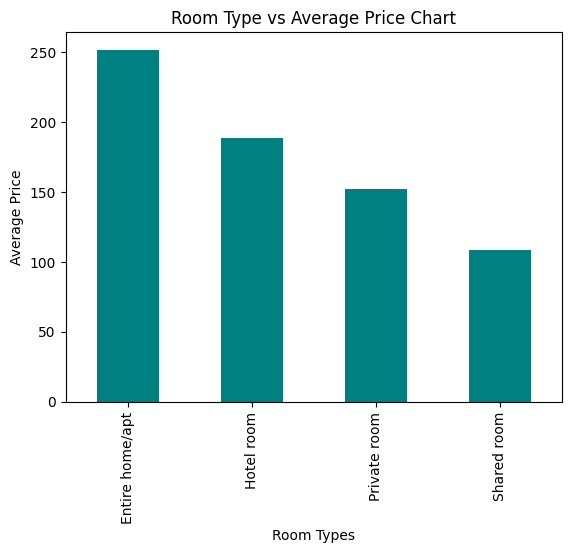

In [ ]:
# plot a graph that depicts a relation between room type and price
price_per_room_type.plot(kind='bar', color='teal');
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart');

In [ ]:
# average price of listings w.r.t neighbourhood
price_per_neighbourhood = calendar_df.groupby('neighbourhood_cleansed').price.mean()
price_per_neighbourhood

neighbourhood_cleansed
Bijlmer-Centrum                           136.125000
Bijlmer-Oost                              150.555556
Bos en Lommer                             180.691617
Buitenveldert - Zuidas                    172.273973
Centrum-Oost                              258.786039
Centrum-West                              264.381625
De Aker - Nieuw Sloten                    224.266667
De Baarsjes - Oud-West                    224.140288
De Pijp - Rivierenbuurt                   242.088197
Gaasperdam - Driemond                     121.116279
Geuzenveld - Slotermeer                   172.358974
IJburg - Zeeburgereiland                  232.379310
Noord-Oost                                172.733945
Noord-West                                182.034286
Oostelijk Havengebied - Indische Buurt    183.836000
Osdorp                                    168.731707
Oud-Noord                                 230.952077
Oud-Oost                                  208.718670
Slotervaart            

Text(0.5, 1.0, 'Neighbourhood vs Average Price Chart')

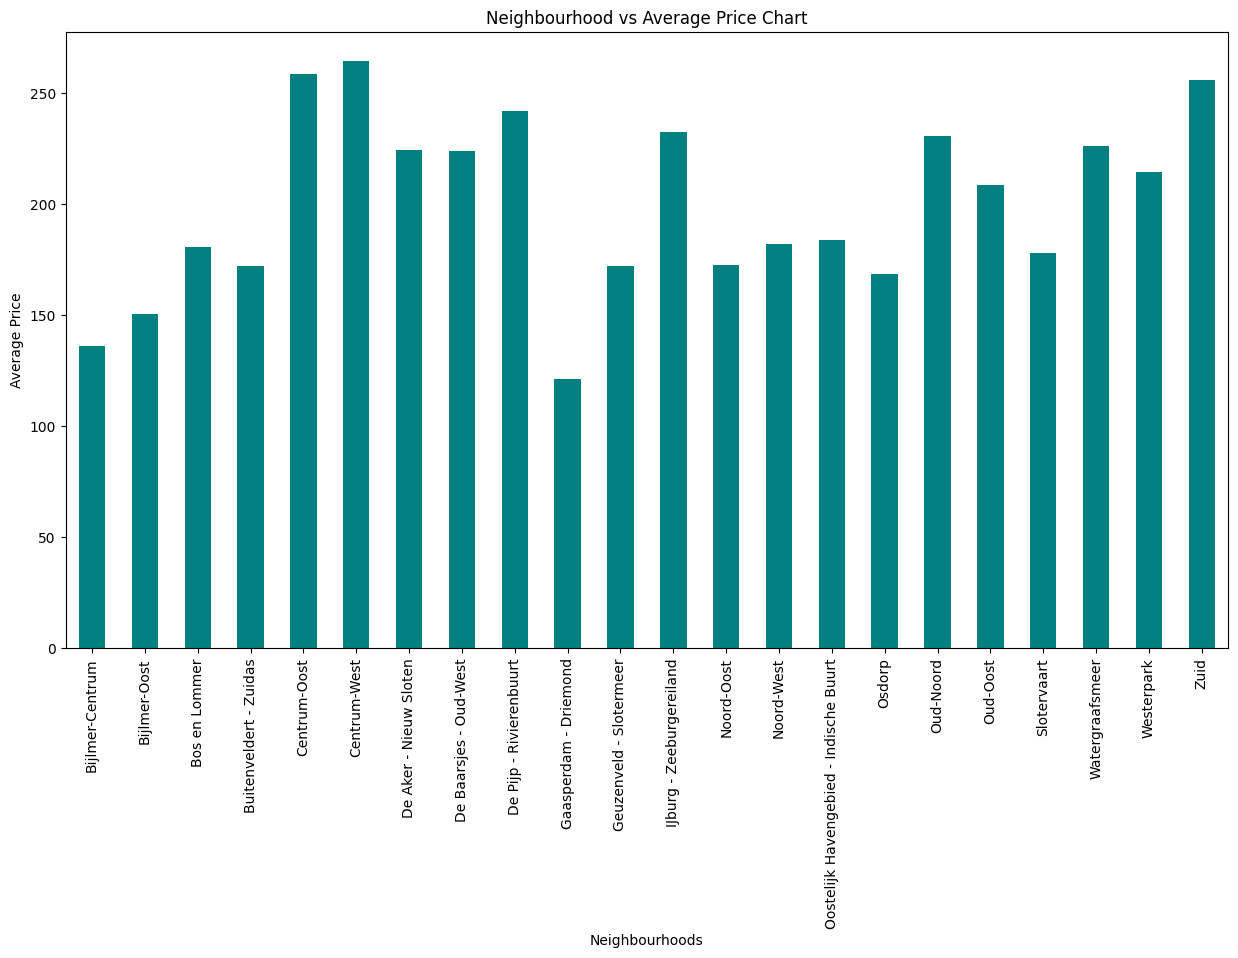

In [ ]:
# plot a graph that depicts a relation between neighbourhood and price
plt.figure(figsize=(15,8));
price_per_neighbourhood.plot(kind='bar', color='teal');
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')

In [ ]:
# average price of listings w.r.t city
price_wrt_bathrooms = calendar_df.groupby('bathrooms_text').price.mean()
price_wrt_bathrooms 


bathrooms_text
0                     306.714286
0 baths               119.625000
0 shared baths         93.375000
1 bath                214.774974
1 private bath        165.202201
1 shared bath         109.482540
1.5 baths             235.315325
1.5 shared baths       98.215470
17 baths             2656.000000
2 baths               356.720207
2 shared baths        103.333333
2.5 baths             448.697368
3 baths               485.753086
3 shared baths        114.500000
3.5 baths             499.680000
4 baths               734.800000
4 shared baths        500.000000
4.5 baths            1042.666667
5 baths               738.833333
5.5 baths            1170.000000
Half-bath             190.500000
Private half-bath     105.000000
Shared half-bath      105.000000
Name: price, dtype: float64

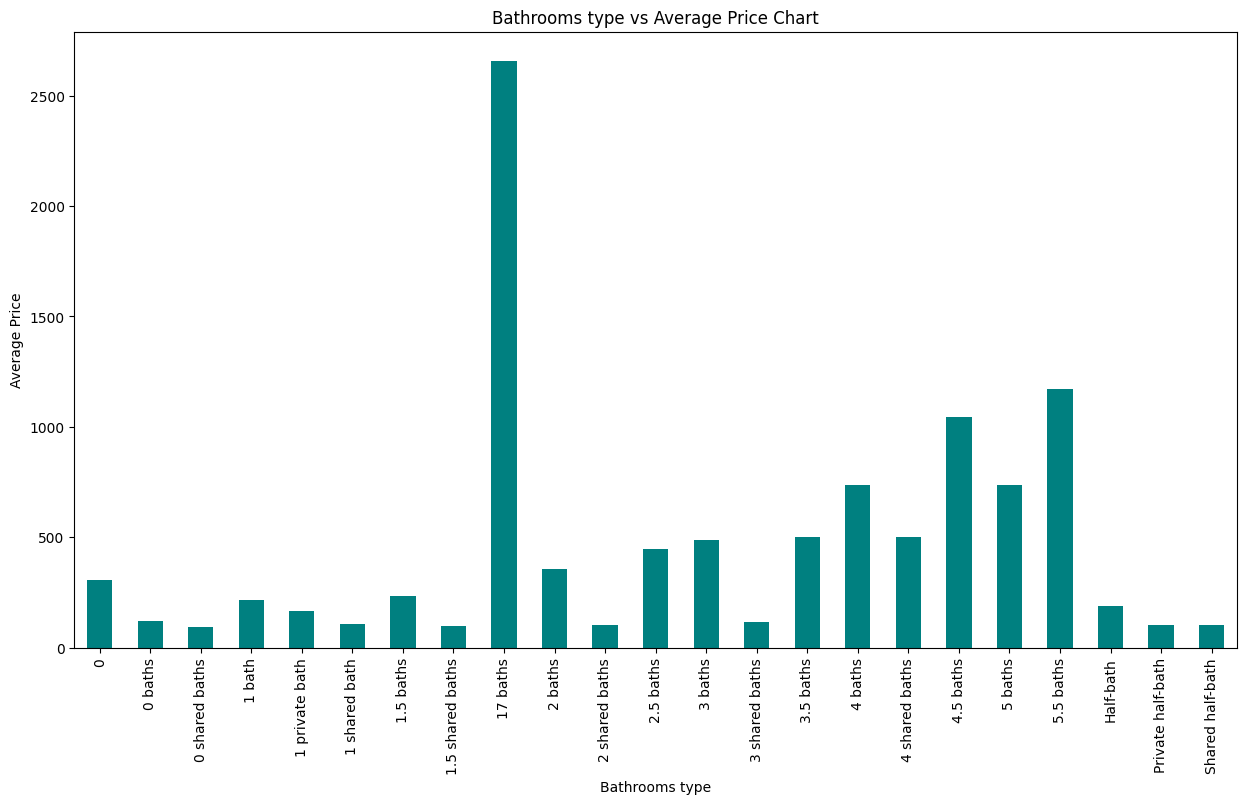

In [ ]:
# plot a graph that depicts a relation between city and price
plt.figure(figsize=(15,8));
price_wrt_bathrooms .plot(kind='bar', color='teal');
plt.xlabel('Bathrooms type')
plt.ylabel('Average Price')
plt.title('Bathrooms type vs Average Price Chart');

In [ ]:
price_per_property_type = calendar_df.groupby('property_type').price.mean()
price_per_property_type

property_type
Barn                                   85.000000
Boat                                  400.395604
Camper/RV                             140.000000
Casa particular                       231.000000
Entire cabin                          132.200000
Entire chalet                         120.000000
Entire condo                          264.387676
Entire cottage                        303.750000
Entire guest suite                    159.000000
Entire guesthouse                     185.866667
Entire home                           288.168803
Entire loft                           308.494186
Entire place                          379.875000
Entire rental unit                    217.298944
Entire serviced apartment             353.512821
Entire townhouse                      273.886792
Entire vacation home                  289.750000
Entire villa                          526.040000
Houseboat                             322.480315
Private room                          223.500000
Privat

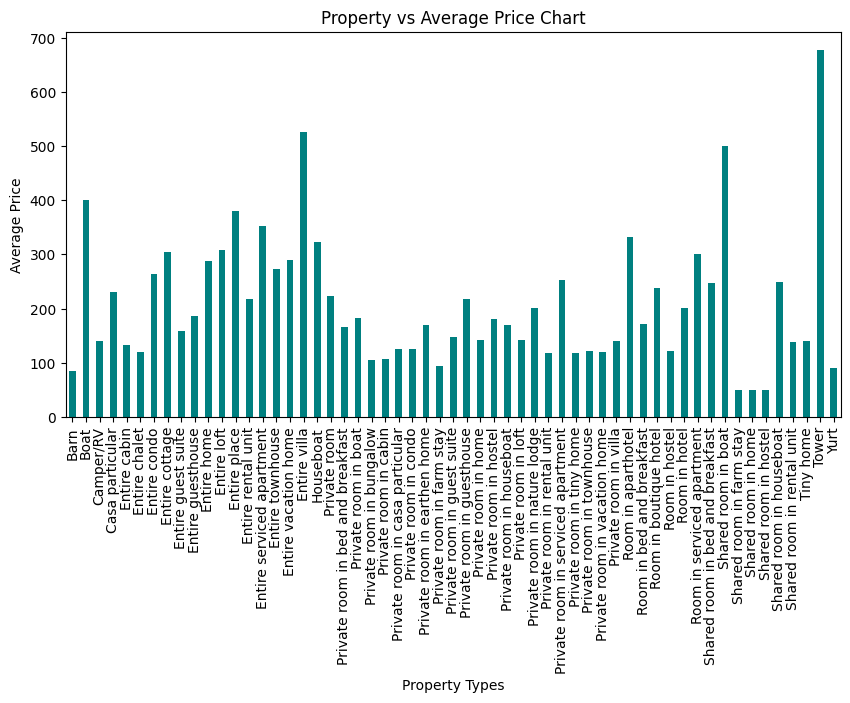

In [ ]:
# plot a graph that depicts a relation between property type and price
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

# How well can we predict reviews and what aspects correlate with reviews?

In [ ]:
calendar_df.review_scores_rating.unique()
ratings_per_neighbourhood = calendar_df.groupby(
    ['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed   property_type                    
Noord-West               Entire cabin                         5.0
Watergraafsmeer          Entire place                         5.0
Buitenveldert - Zuidas   Entire townhouse                     5.0
                         Private room in bed and breakfast    5.0
                         Private room in casa particular      5.0
                                                             ... 
Westerpark               Entire guesthouse                    0.0
Centrum-Oost             Private room in earthen home         0.0
Watergraafsmeer          Tiny home                            0.0
Geuzenveld - Slotermeer  Room in aparthotel                   0.0
Oud-Noord                Casa particular                      0.0
Name: review_scores_rating, Length: 458, dtype: float64

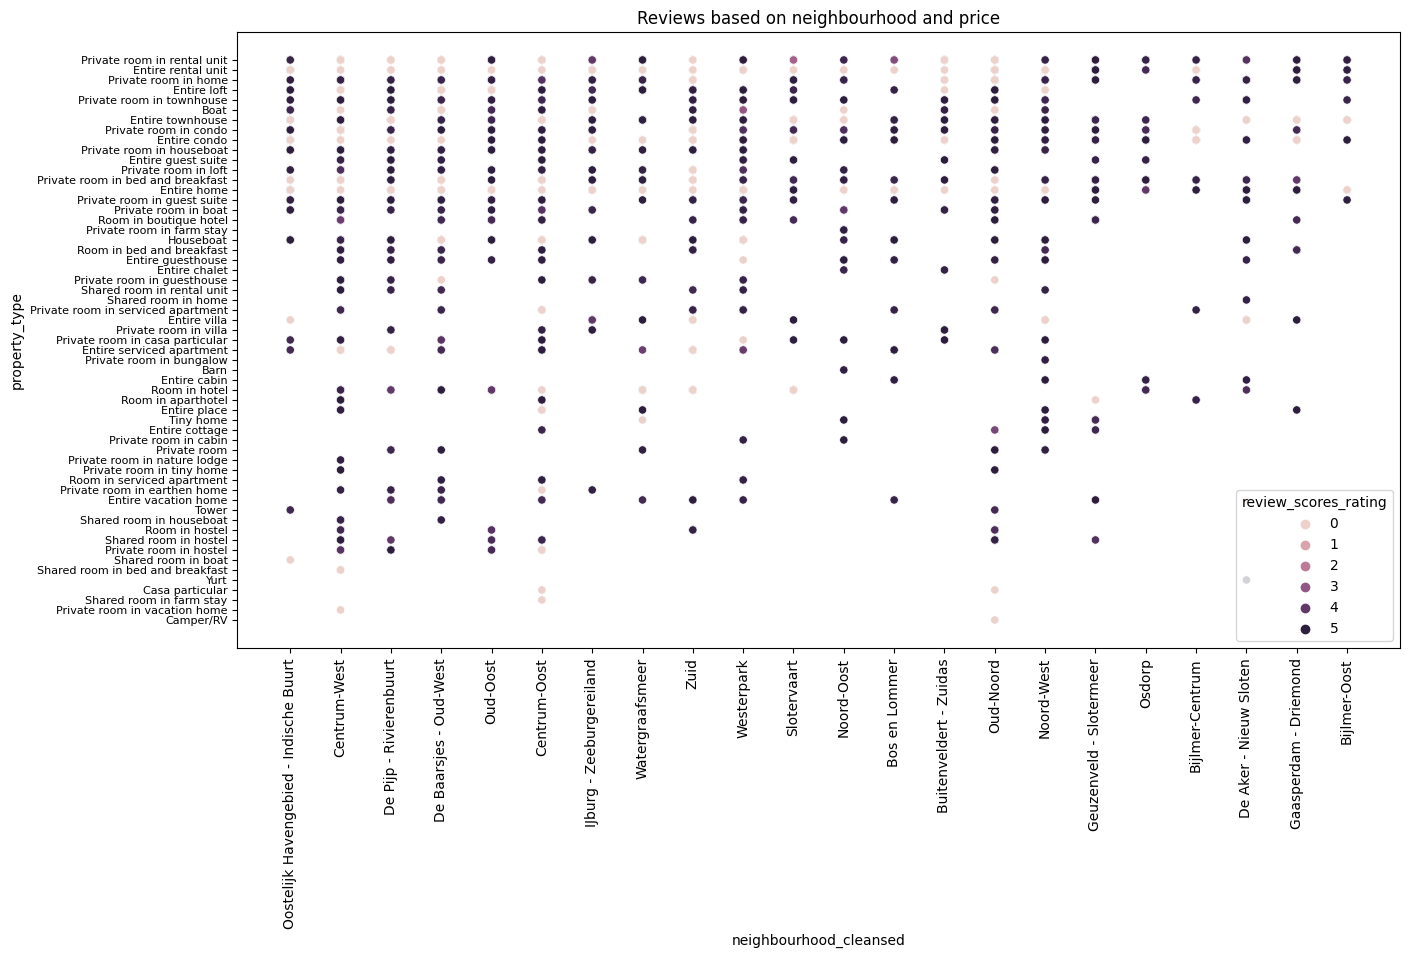

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=calendar_df)
plt.xticks(rotation=90)
plt.yticks(fontsize=8) # Reduce font size of y-axis labels
plt.title('Reviews based on neighbourhood and price')
plt.show()


In [ ]:
ratings_per_property_type = calendar_df.groupby('property_type').review_scores_rating.mean()
ratings_per_property_type

property_type
Barn                                  4.890000
Boat                                  3.987802
Camper/RV                             0.000000
Casa particular                       0.000000
Entire cabin                          4.880000
Entire chalet                         4.745000
Entire condo                          4.307988
Entire cottage                        4.455000
Entire guest suite                    4.874444
Entire guesthouse                     4.568000
Entire home                           4.052265
Entire loft                           4.435116
Entire place                          4.315000
Entire rental unit                    4.330459
Entire serviced apartment             3.935641
Entire townhouse                      4.423915
Entire vacation home                  4.147500
Entire villa                          3.711200
Houseboat                             4.577008
Private room                          4.880000
Private room in bed and breakfast     4.466691

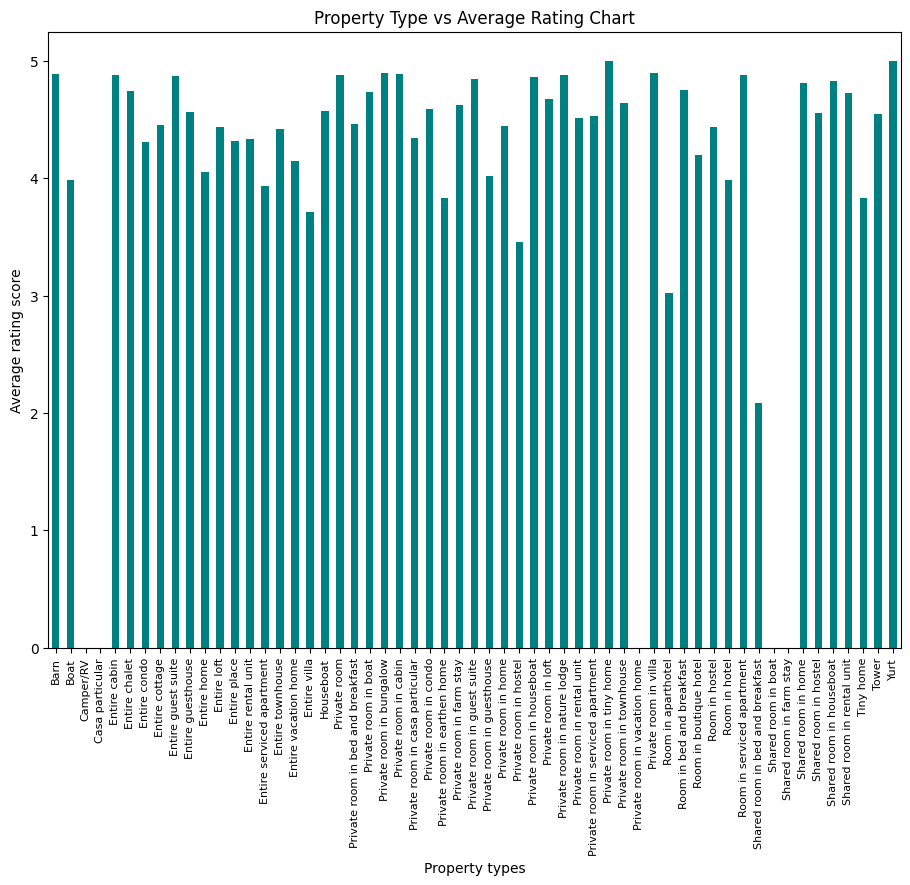

In [ ]:
plt.figure(figsize=(11, 8))
ratings_per_property_type.plot(kind='bar',color='teal');

plt.xticks(fontsize=8)
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');

Text(0.5, 1.0, 'Property_type, Bedrooms vs Average Rating Chart')

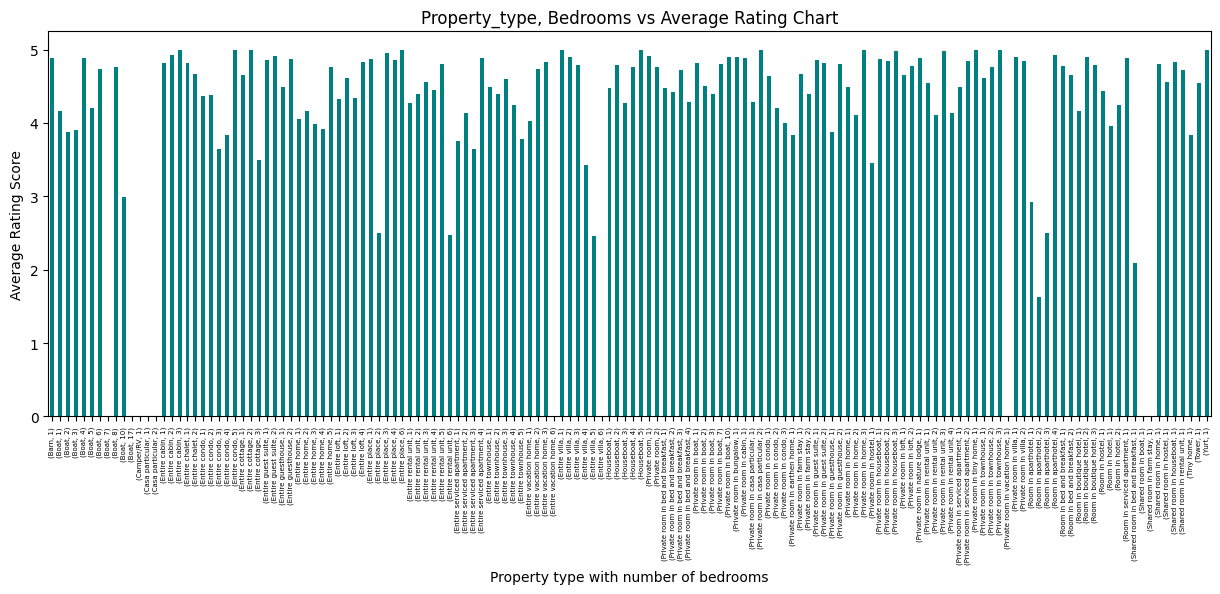

In [ ]:
ratings_per_bedrooms = calendar_df.groupby(['property_type', 'bedrooms']).review_scores_rating.mean()
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='teal')
plt.xticks(fontsize=5)
plt.xticks(rotation=90)
plt.xlabel('Property type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bedrooms vs Average Rating Chart')

In [ ]:
calendar_df.bathrooms_text.unique()

ratings_per_bathrooms = calendar_df.groupby(['property_type', 'bathrooms_text']).review_scores_rating.mean()

# conclusions
1.   average price is in the following order for room type entirehome/apt>hotel 
room>private room>shared room
2.   centrum west nieghbourhood has the highest average price among all nieghbourhoods while gaasperdam driemond has minimum averge price.
3.  listing with 17 bathrooms have the highest average price while.0,1,2 and 3 shared baths,private half bath and shared half bath have minimum value for average price.
4.tower property type has the highest value for average price.shared room in farm stay ,home and hostel have minimum value for average price.
5.yurt barn and entire cabin property has the highest rating amongst all property type.









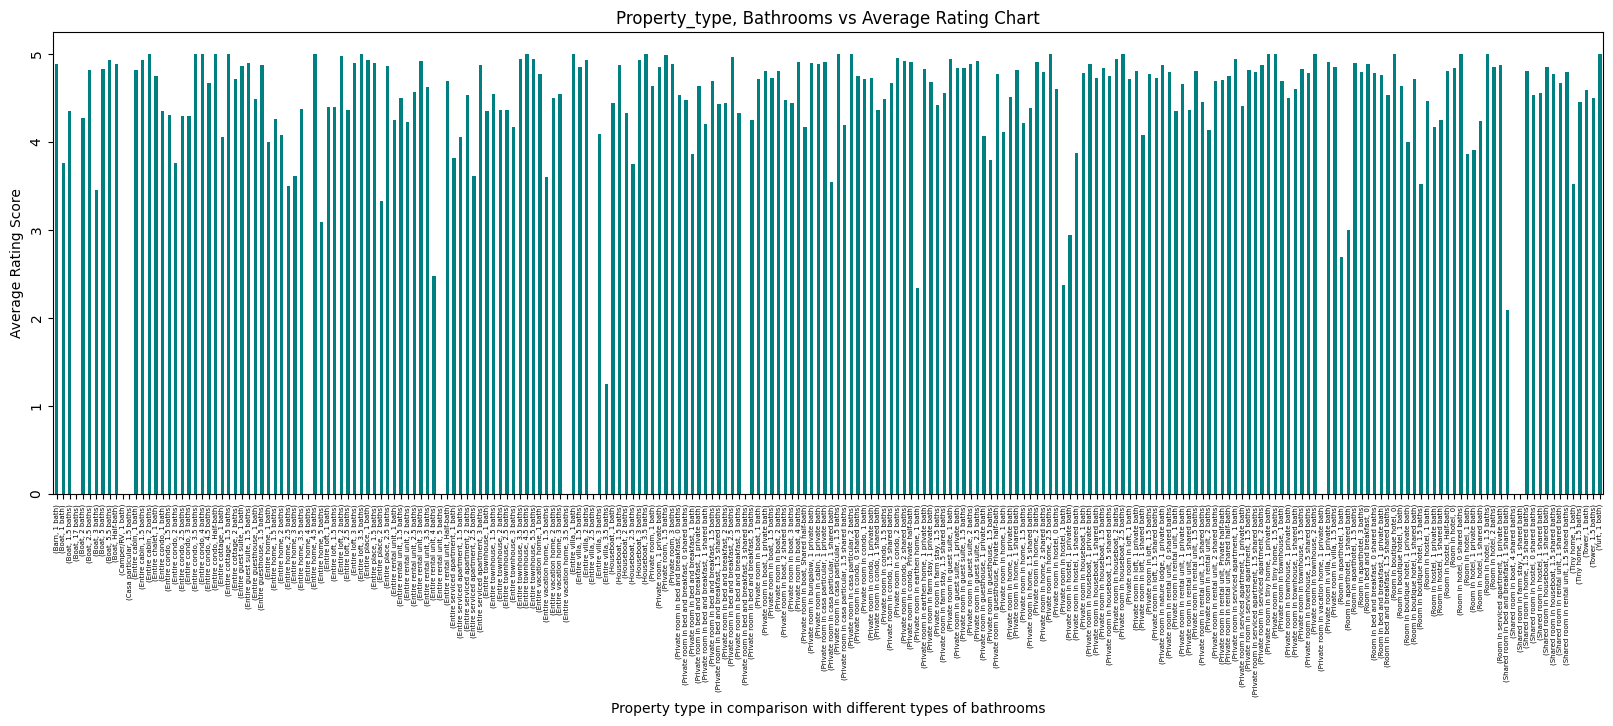

In [ ]:
plt.figure(figsize=(20, 6))
ratings_per_bathrooms.plot(kind='bar',color='teal');
plt.xticks(fontsize=5)
plt.yticks(rotation=90)
plt.xlabel('Property type in comparison with different types of bathrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bathrooms vs Average Rating Chart');

# Converting categorical data to numerical values

In [ ]:
duplicates = calendar_df[calendar_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_total_listings_count, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 40 columns]


In [ ]:
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['host_is_superhost'] = le.fit_transform(calendar_df['host_is_superhost'])
calendar_df['host_is_superhost'] = calendar_df['host_is_superhost'].astype(bool).astype(int)

In [ ]:
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['host_identity_verified'] = le.fit_transform(calendar_df['host_identity_verified'])
calendar_df['host_identity_verified'] = calendar_df['host_identity_verified'].astype(bool).astype(int)

In [ ]:
le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['instant_bookable'] = le.fit_transform(calendar_df['instant_bookable'])
calendar_df['instant_bookable'] = calendar_df['instant_bookable'].astype(bool).astype(int)

In [ ]:

le = LabelEncoder()

# Fit the label encoder to the categorical column
calendar_df['has_availability'] = le.fit_transform(calendar_df['has_availability'])
calendar_df['has_availability'] = calendar_df['has_availability'].astype(bool).astype(int)
print(calendar_df['has_availability'])

0       1
1       1
2       1
3       1
4       1
       ..
6993    0
6994    1
6995    0
6996    0
6997    0
Name: has_availability, Length: 6714, dtype: int64


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   int64  
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   int64  
 7   neighbourhood                                 4333 non-null   object 
 8   neighbourhood_cleansed                        6714 non-null   object 
 9   latitude                                      6714 non-null   f

In [ ]:
calendar_df['neighbourhood_cleansed'].head()

0    Oostelijk Havengebied - Indische Buurt
1                              Centrum-West
2                   De Pijp - Rivierenbuurt
3                   De Pijp - Rivierenbuurt
4                    De Baarsjes - Oud-West
Name: neighbourhood_cleansed, dtype: object

In [ ]:
calendar_df.describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.714000e+03,6714.000000,5755.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,...,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.00000,6714.000000,6048.000000
mean,1.922869e+17,66.959637,78.988532,0.191242,2.462466,4.365356,0.890527,52.366770,4.890102,2.931338,...,4.393393,4.404248,4.311467,4.181053,0.200775,1.788502,1.024278,0.67322,0.040512,1.103160
std,3.167630e+17,45.144197,26.935037,0.393309,13.028238,26.405113,0.312255,0.017031,0.035072,1.398396,...,1.478962,1.482610,1.454808,1.424012,0.400610,2.465966,1.377559,1.92976,0.456507,2.396371
min,2.818000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,52.290340,4.755710,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.010000
25%,1.568583e+07,0.000000,65.000000,0.000000,1.000000,1.000000,1.000000,52.355953,4.866300,2.000000,...,4.780000,4.800000,4.600000,4.430000,0.000000,1.000000,1.000000,0.00000,0.000000,0.260000
50%,3.547856e+07,100.000000,92.000000,0.000000,1.000000,1.000000,1.000000,52.365995,4.887950,2.000000,...,4.940000,4.960000,4.820000,4.670000,0.000000,1.000000,1.000000,0.00000,0.000000,0.520000
75%,5.953137e+17,100.000000,100.000000,0.000000,2.000000,3.000000,1.000000,52.376440,4.908228,4.000000,...,5.000000,5.000000,4.990000,4.810000,0.000000,1.000000,1.000000,1.00000,0.000000,1.130000
max,8.427546e+17,100.000000,100.000000,1.000000,522.000000,699.000000,1.000000,52.425120,5.026430,16.000000,...,5.000000,5.000000,5.000000,5.000000,1.000000,22.000000,14.000000,20.00000,8.000000,111.590000


In [ ]:
# Find number of unique values in room_type column
calendar_df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,100.0,100.0,1,1,1,1,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.36435,...,4.97,4.98,4.69,4.81,0,1,0,1,0,1.90
1,311124,100.0,68.0,0,1,1,0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.37104,...,4.90,4.92,4.93,4.60,0,1,1,0,0,0.66
2,319985,93.0,89.0,1,2,3,1,"De Pijp, North Holland, Netherlands",De Pijp - Rivierenbuurt,52.35669,...,4.86,4.78,4.85,4.62,0,2,1,1,0,3.73
3,327285,100.0,100.0,0,3,4,1,"Amsterdam, North Holland, Netherlands",De Pijp - Rivierenbuurt,52.35625,...,4.98,4.99,4.91,4.84,1,2,0,2,0,4.19
4,331946,0.0,NaN,0,1,1,1,NaN,De Baarsjes - Oud-West,52.36060,...,4.92,4.88,4.79,4.75,0,1,1,0,0,0.24


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   int64  
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   int64  
 7   neighbourhood                                 4333 non-null   object 
 8   neighbourhood_cleansed                        6714 non-null   object 
 9   latitude                                      6714 non-null   f

In [ ]:
#remove rows that have 'NaN' in key features 
remove =calendar_df[u'price'].isnull() | calendar_df[u'review_scores_rating'].isnull() 
calendar_df = calendar_df[-remove]

In [ ]:
print(calendar_df.shape)
#print(df.head())
length = len(calendar_df)

(6714, 40)


In [ ]:
# find the unique values that occur in the "bathroom_text" column
unique_values = calendar_df['bathrooms_text'].unique()

# print the unique values
print(unique_values)

['1.5 shared baths' '1 bath' '1.5 baths' '1 private bath' '1 shared bath'
 '2 baths' '2.5 baths' '3.5 baths' '3 baths' 'Private half-bath' '0 baths'
 '0 shared baths' '4 baths' 0 'Half-bath' '5 baths' 'Shared half-bath'
 '2 shared baths' '5.5 baths' '4 shared baths' '17 baths' '4.5 baths'
 '3 shared baths']


In [ ]:

calendar_df['bathrooms_text'] = calendar_df['bathrooms_text'].astype(str)
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object to the unique values in the "bathroom_text" column
le.fit(calendar_df['bathrooms_text'].unique())

# use the LabelEncoder object to transform the "bathroom_text" column to integer labels
calendar_df['bathrooms_text'] = le.transform(calendar_df['bathrooms_text'])

# print the updated dataframe
print(calendar_df)

                      id  host_response_rate  host_acceptance_rate  \
0                   2818               100.0                 100.0   
1                 311124               100.0                  68.0   
2                 319985                93.0                  89.0   
3                 327285               100.0                 100.0   
4                 331946                 0.0                   NaN   
...                  ...                 ...                   ...   
6993  842462220391708128                 0.0                   NaN   
6994  842493348876281257                 0.0                   NaN   
6995  842634905680862660                 0.0                   NaN   
6996  842713539293550316                 0.0                   NaN   
6997  842754604161195632               100.0                 100.0   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     1                    1                          1   
1        

In [ ]:
calendar_df['neighbourhood'] = calendar_df['neighbourhood'].astype(str)
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object to the unique values in the "bathroom_text" column
le.fit(calendar_df['neighbourhood'].unique())

# use the LabelEncoder object to transform the "bathroom_text" column to integer labels
calendar_df['neighbourhood'] = le.transform(calendar_df['neighbourhood'])

# print the updated dataframe
print(calendar_df)

                      id  host_response_rate  host_acceptance_rate  \
0                   2818               100.0                 100.0   
1                 311124               100.0                  68.0   
2                 319985                93.0                  89.0   
3                 327285               100.0                 100.0   
4                 331946                 0.0                   NaN   
...                  ...                 ...                   ...   
6993  842462220391708128                 0.0                   NaN   
6994  842493348876281257                 0.0                   NaN   
6995  842634905680862660                 0.0                   NaN   
6996  842713539293550316                 0.0                   NaN   
6997  842754604161195632               100.0                 100.0   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     1                    1                          1   
1        

In [ ]:


calendar_df['neighbourhood_cleansed'] = calendar_df['neighbourhood_cleansed'].astype(str)
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object to the unique values in the "bathroom_text" column
le.fit(calendar_df['neighbourhood_cleansed'].unique())

# use the LabelEncoder object to transform the "bathroom_text" column to integer labels
calendar_df['neighbourhood_cleansed'] = le.transform(calendar_df['neighbourhood_cleansed'])

# print the updated dataframe
print(calendar_df)

                      id  host_response_rate  host_acceptance_rate  \
0                   2818               100.0                 100.0   
1                 311124               100.0                  68.0   
2                 319985                93.0                  89.0   
3                 327285               100.0                 100.0   
4                 331946                 0.0                   NaN   
...                  ...                 ...                   ...   
6993  842462220391708128                 0.0                   NaN   
6994  842493348876281257                 0.0                   NaN   
6995  842634905680862660                 0.0                   NaN   
6996  842713539293550316                 0.0                   NaN   
6997  842754604161195632               100.0                 100.0   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     1                    1                          1   
1        

In [ ]:
calendar_df['property_type'] = calendar_df['property_type'].astype(str)
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object to the unique values in the "bathroom_text" column
le.fit(calendar_df['property_type'].unique())

# use the LabelEncoder object to transform the "bathroom_text" column to integer labels
calendar_df['property_type'] = le.transform(calendar_df['property_type'])

# print the updated dataframe
print(calendar_df)

                      id  host_response_rate  host_acceptance_rate  \
0                   2818               100.0                 100.0   
1                 311124               100.0                  68.0   
2                 319985                93.0                  89.0   
3                 327285               100.0                 100.0   
4                 331946                 0.0                   NaN   
...                  ...                 ...                   ...   
6993  842462220391708128                 0.0                   NaN   
6994  842493348876281257                 0.0                   NaN   
6995  842634905680862660                 0.0                   NaN   
6996  842713539293550316                 0.0                   NaN   
6997  842754604161195632               100.0                 100.0   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     1                    1                          1   
1        

In [ ]:
calendar_df['room_type'] = calendar_df['room_type'].astype(str)
# instantiate a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder object to the unique values in the "bathroom_text" column
le.fit(calendar_df['room_type'].unique())

# use the LabelEncoder object to transform the "bathroom_text" column to integer labels
calendar_df['room_type'] = le.transform(calendar_df['room_type'])

# print the updated dataframe
print(calendar_df)

                      id  host_response_rate  host_acceptance_rate  \
0                   2818               100.0                 100.0   
1                 311124               100.0                  68.0   
2                 319985                93.0                  89.0   
3                 327285               100.0                 100.0   
4                 331946                 0.0                   NaN   
...                  ...                 ...                   ...   
6993  842462220391708128                 0.0                   NaN   
6994  842493348876281257                 0.0                   NaN   
6995  842634905680862660                 0.0                   NaN   
6996  842713539293550316                 0.0                   NaN   
6997  842754604161195632               100.0                 100.0   

      host_is_superhost  host_listings_count  host_total_listings_count  \
0                     1                    1                          1   
1        

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   int64  
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   int64  
 7   neighbourhood                                 6714 non-null   int64  
 8   neighbourhood_cleansed                        6714 non-null   int64  
 9   latitude                                      6714 non-null   f

In [ ]:
#create a list containing all amenities from each host
amenities = list(calendar_df['amenities'])
#merge all amenities from hosts into one single list
am = ','.join(amenities)
#remove the left and right brackets
am = am.replace('[','')
am = am.replace(']','')
#split each element with a comma
am = am.split(',')
#Turn the list of amenities into a set
amenity_items = list(set(am))
amenity_items = list(filter(None, amenity_items))

#Remove quotations of each item
for i in range(len(amenity_items)):
    amenity_items[i] = re.sub(r'^"|"$', '', amenity_items[i])

#Remove wrong data values called "Translation missing"  
for item in amenity_items:
    match = re.match(r'translation',item)
    if match:
        amenity_items.remove(item)
for i in range(len(amenities)):
    amenities[i] = amenities[i].replace('[','')
    amenities[i] = amenities[i].replace(']','')
    amenities[i] = amenities[i].split(',')
    for j in range(len(amenities[i])):
        amenities[i][j] = re.sub(r'^"|"$', '', amenities[i][j])


In [ ]:
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('internet|pocket wifi|wifi|ethernet connection'), 'internet'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('24-hour check-in'), 'check_in_24h'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('air conditioning|central|heating|ceiling fans|central air conditioning|ac|heating|fans'), 'climate_control'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('amazon prime video|hbo max|chromecast|disney +|amazon echo|apple tv|game console|netflix|projector and screen|smart tv|tv|hdtv'), 'high_end_electronics'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('cable|sound system|speaker|record player|roku|board games|books and reading material|dvd player'), 'entertainment'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('pool table|pingpong|piano|backyard'), 'recreation'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('bbq grill|barbecue utensils|fire pit|propane barbeque|bbq'), 'bbq'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('balcony|patio'), 'balcony'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('beach view|beachfront|lake access|mountain view|ski-in/ski-out|waterfront|access'), 'nature_and_views'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('breakfast'), 'breakfast'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('changing table|high chair|crib|baby bath|baby monitor|baby safety gates'), 'baby_equipment'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('iron|closet|clothing storage'), 'clothing_care_and_storage'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('coffee maker|espresso machine|coffee|french press'), 'coffee_machine'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('cooking basics|stove|blender|oven|toaster|rice maker|microwave|kitchen|dishware|silverware'), 'kitchen_appliances'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('safe|carbon monoxide alarm|smoke alarm|security system|security cameras| room-darkening shades|window guards|guards|fire extinguisher'), 'security'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('soap|conditioner|shower gel|body wash|shampoo|body gel|toiletries|slippers'), 'personal_care_items'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('dishwasher|dryer|washer|laundry|drying rack'), 'white_goods'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('elevator'), 'elevator'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('exercise equipment|gym|fitness center'), 'gym'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('bathrobes|hair dryer|soap|conditioner|shower gel|body wash|shampoo|body gel|toiletries|slippers'), 'personal_care_items'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('family/kid friendly|children'), 'child_friendly'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('self-parking|parking|valet parking|garage|carport'), 'parking'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('garden|outdoor|sun loungers|terrace'), 'outdoor_space'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('host greets you'), 'host_greeting'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('hot tub|jetted tub|sauna|pool'), 'hot_tub_sauna_or_pool'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('long term stays allowed'), 'long_term_stays'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('pets|pet|cat(s)|dog(s)'), 'pets_allowed'] = 1
calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('private entrance|private'), 'private_entrance'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('self check-in'), 'self_check_in'] = 1
# calendar_df.loc[calendar_df['amenities'].str.lower().str.contains('smoking allowed'), 'smoking_allowed'] = 1

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = calendar_df.iloc[:,41:].columns
calendar_df[cols_to_replace_nulls] = calendar_df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in calendar_df.iloc[:,41:].columns:
    if calendar_df[col].sum() > len(calendar_df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

calendar_df.drop(infrequent_amenities, axis=1, inplace=True)
calendar_df.drop('amenities', axis=1, inplace=True)

['climate_control', 'high_end_electronics', 'entertainment', 'recreation', 'bbq', 'balcony', 'nature_and_views', 'baby_equipment', 'clothing_care_and_storage', 'coffee_machine', 'kitchen_appliances', 'security', 'personal_care_items', 'white_goods', 'child_friendly', 'parking', 'outdoor_space', 'long_term_stays', 'private_entrance']


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   int64  
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   int64  
 7   neighbourhood                                 6714 non-null   int64  
 8   neighbourhood_cleansed                        6714 non-null   int64  
 9   latitude                                      6714 non-null   f

# Model training 

In [ ]:
num_rows = calendar_df.shape[0]
print(f'The DataFrame has {num_rows} rows.')

# get the number of columns
num_cols = calendar_df.shape[1]
print(f'The DataFrame has {num_cols} columns.')

The DataFrame has 6714 rows.
The DataFrame has 43 columns.


In [ ]:
X = calendar_df.drop('price', axis=1)
y = calendar_df['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 6997
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6714 non-null   int64  
 1   host_response_rate                            6714 non-null   float64
 2   host_acceptance_rate                          5755 non-null   float64
 3   host_is_superhost                             6714 non-null   int64  
 4   host_listings_count                           6714 non-null   int64  
 5   host_total_listings_count                     6714 non-null   int64  
 6   host_identity_verified                        6714 non-null   int64  
 7   neighbourhood                                 6714 non-null   int64  
 8   neighbourhood_cleansed                        6714 non-null   int64  
 9   latitude                                      6714 non-null   f

In [ ]:
# dealing with missing values in x

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
print(X_imputed.shape)



(6714, 42)


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_imputed)
X_scaled



array([[-0.6070825 ,  0.73193957,  0.75561941, ..., -0.19747712,
         3.94169327, -0.21589236],
       [-0.6070825 ,  0.73193957, -0.50683904, ..., -0.19747712,
        -0.25369808, -0.21589236],
       [-0.6070825 ,  0.57686934,  0.32164932, ..., -0.19747712,
        -0.25369808, -0.21589236],
       ...,
       [ 2.05325876, -1.48334954,  0.4400048 , ..., -0.19747712,
        -0.25369808, -0.21589236],
       [ 2.05350702, -1.48334954,  0.4400048 , ..., -0.19747712,
        -0.25369808, -0.21589236],
       [ 2.05363667,  0.73193957,  0.75561941, ..., -0.19747712,
        -0.25369808, -0.21589236]])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the model on the training set
y_pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE on the training set:', mse_train)

# Evaluate the performance of the model on the validation set
y_pred_val = lr.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print('MSE on the validation set:', mse_val)

# Evaluate the performance of the model on the testing set
y_pred_test = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the testing set:', mse_test)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(lr, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print('Mean MSE from cross-validation:', mse_scores.mean())
print('Standard deviation of MSE from cross-validation:', mse_scores.std())


MSE on the training set: 24421.77799746299
MSE on the validation set: 14959.948036258296
MSE on the testing set: 13461.520051641273
Mean MSE from cross-validation: 23950.570338220732
Standard deviation of MSE from cross-validation: 20105.792761417157


In [ ]:
lr.score(X_train,y_train)

0.32129237204663985

In [ ]:
lr.score(X_test,y_test)

0.48787741826370157

In [ ]:
scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Convert the scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
print('Mean MSE:', mse_scores.mean())
print('Standard deviation of MSE:', mse_scores.std())

Mean MSE: 23538.784397430514
Standard deviation of MSE: 16509.758097446982


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X_scaled)
print(X_pca.shape)
X_pca



(6714, 24)


array([[ 1.95030137e+00,  2.51215719e+00,  1.13137903e+00, ...,
         5.58814358e-01,  2.88867486e-03,  6.29905308e-01],
       [ 2.04762017e-01,  2.35829297e+00, -2.64559902e+00, ...,
        -4.14783862e-01, -8.83997138e-01,  2.99064716e-02],
       [ 1.65785586e+00,  2.92661968e+00,  8.87160176e-01, ...,
         8.41532210e-01, -4.92820836e-01, -5.78472624e-01],
       ...,
       [-9.25503591e+00,  4.21572680e-01,  1.86560601e+00, ...,
         1.66186418e-01,  1.78757635e-01, -1.96209099e-01],
       [-9.46392277e+00,  6.83034414e-01,  4.20363403e-01, ...,
         2.64081911e-01,  6.03408578e-01,  9.35880481e-02],
       [-9.13489027e+00, -5.21991569e-01,  9.77609258e-01, ...,
        -1.38275675e-01, -6.25041336e-01,  4.41362305e-01]])

In [ ]:
pca.n_components_

24

In [ ]:
pca.explained_variance_ratio_

array([0.18263507, 0.13388344, 0.07558747, 0.06695067, 0.05270501,
       0.04375019, 0.03295423, 0.03055243, 0.02830847, 0.02682503,
       0.02595214, 0.02510876, 0.0247052 , 0.02329972, 0.02239581,
       0.02208542, 0.02153109, 0.02093592, 0.01893265, 0.01850294,
       0.01714532, 0.01592532, 0.0125195 , 0.01094429])

In [ ]:
# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the model on the training set
y_pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE on the training set:', mse_train)

# Evaluate the performance of the model on the validation set
y_pred_val = lr.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print('MSE on the validation set:', mse_val)

# Evaluate the performance of the model on the testing set
y_pred_test = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the testing set:', mse_test)

# Evaluate the performance of the model using cross-validation
scores = cross_val_score(lr, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print('Mean MSE from cross-validation:', mse_scores.mean())
print('Standard deviation of MSE from cross-validation:', mse_scores.std())

MSE on the training set: 24279.615785864047
MSE on the validation set: 15162.346940043442
MSE on the testing set: 13524.270992291058
Mean MSE from cross-validation: 23950.570338220732
Standard deviation of MSE from cross-validation: 20105.792761417157


In [ ]:
# Split the dataset into training and testing sets
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y, test_size=0.095, random_state=32)

In [ ]:
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train_pca,y_train_pca)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred_train = lr.predict(X_train_pca)
mse_train = mean_squared_error(y_train_pca, y_pred_train)
print('MSE on the training set:', mse_train)

MSE on the training set: 23899.811459133678


In [ ]:
lr.score(X_test_pca,y_test_pca)

0.5011754563854348

In [ ]:
lr.score(X_train_pca,y_train_pca)

0.30483389499986935

# Random forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.095, random_state=32)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=32)

In [ ]:
#evaluating model on training set
y_pred_train = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE on the training set:', mse_train)

MSE on the training set: 3546.7399857572595


In [ ]:
#evaluating model on testing set
y_pred_test = rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the testing set:', mse_test)


MSE on the testing set: 10944.929494370428


In [ ]:
# accuracy the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

Train R^2 score: 0.8968371183361433
Test R^2 score: 0.596828105449518


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=32)
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y, test_size=0.095, random_state=32)
rf.fit(X_train_pca,y_train_pca)

RandomForestRegressor(random_state=32)

In [ ]:
# accuracy the model
train_score = rf.score(X_train_pca, y_train_pca)
test_score = rf.score(X_test_pca, y_test_pca)

print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

Train R^2 score: 0.9000246613613135
Test R^2 score: 0.5902462356341445


In [ ]:
# Calculate the mean price of the training set
mean_price = y_train.mean()

# Create a list of the same length as y_test, filled with the mean price
baseline_preds = [mean_price] * len(y_test)

# Calculate the mean squared error of the baseline model
baseline_mse = mean_squared_error(y_test, baseline_preds)
print("Baseline MSE:", baseline_mse)


Baseline MSE: 27187.473727381726


In [ ]:
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Random Forest RMSE: {rmse}")

Random Forest RMSE: 104.61801706384244


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.095, random_state=32)
rf = RandomForestRegressor(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
importances = rf.feature_importances_
for feature, importance in zip(range(X_train.shape[1]), importances):
    print(f"Feature {feature}: Importance {importance}")



Feature 0: Importance 0.017092154490879346
Feature 1: Importance 0.0066227137914997855
Feature 2: Importance 0.024067868352626504
Feature 3: Importance 0.0015962581109272836
Feature 4: Importance 0.0044372399254115295
Feature 5: Importance 0.020427116683791543
Feature 6: Importance 0.004371625659518701
Feature 7: Importance 0.08068393829515198
Feature 8: Importance 0.02216484072346999
Feature 9: Importance 0.035778386163454134
Feature 10: Importance 0.04118208810294725
Feature 11: Importance 0.03145826581918827
Feature 12: Importance 0.01366767438387698
Feature 13: Importance 0.133302887635675
Feature 14: Importance 0.07067052825961988
Feature 15: Importance 0.04169399619961729
Feature 16: Importance 0.034742991784088115
Feature 17: Importance 0.0011002933202105252
Feature 18: Importance 0.024790788799692928
Feature 19: Importance 0.03829904480744114
Feature 20: Importance 0.0499288107545837
Feature 21: Importance 0.06141262656894333
Feature 22: Importance 0.0198809687445782
Feature 23

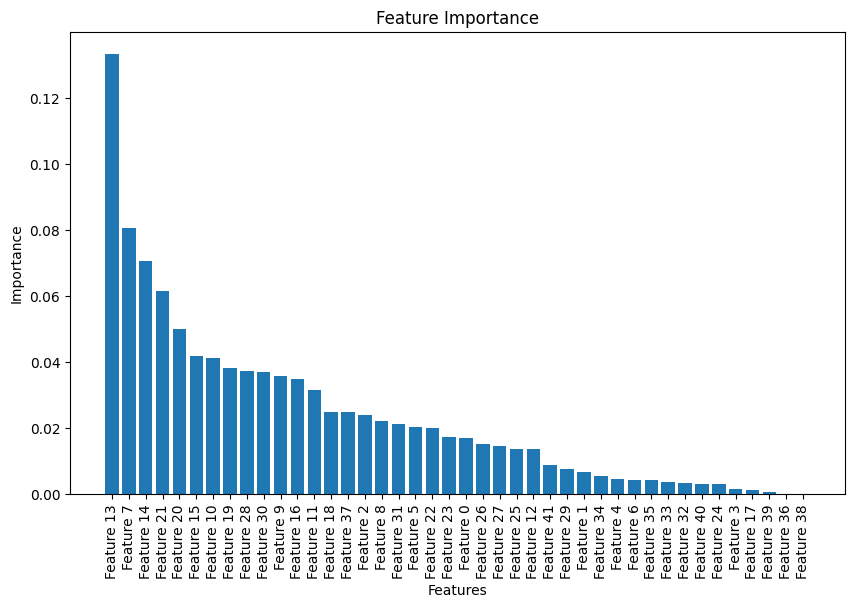

In [ ]:
import matplotlib.pyplot as plt

# Calculate feature importances
importances = rf.feature_importances_

# Create an array of feature indices
feature_indices = range(len(importances))

# Sort feature importances in descending order
sorted_indices = sorted(feature_indices, key=lambda i: importances[i], reverse=True)

# Create labels for the features
feature_labels = [f"Feature {i}" for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_labels, [importances[i] for i in sorted_indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.095, random_state=32)
rf = RandomForestRegressor(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top (most important) features by excluding the last 13 features
selected_indices = sorted_indices[:-16]

# Update X_train and X_test with selected features
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# Train a new model with the selected features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=32)
rf_selected.fit(X_train_selected, y_train)



RandomForestRegressor(random_state=32)

In [ ]:
from sklearn.metrics import r2_score

# Calculate the R^2 score for the original model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print('Original Model')
print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

# Calculate the R^2 score for the model with selected features
train_score_selected = rf_selected.score(X_train_selected, y_train)
test_score_selected = rf_selected.score(X_test_selected, y_test)

print('Model with Selected Features')
print('Train R^2 score:', train_score_selected)
print('Test R^2 score:', test_score_selected)


Original Model
Train R^2 score: 0.8968371183361433
Test R^2 score: 0.596828105449518
Model with Selected Features
Train R^2 score: 0.8962953423832977
Test R^2 score: 0.6234845585635633
